In [12]:
from importlib import reload
try:
    core = reload(core)
except:
    import core
from core import *
# ROOT_DIR = "./data/GERNAS/POST_GERNA/"
ROOT_DIR = "./data/REGNA/"

In [13]:
qos_re_class_range = [True,False]
seed_range = [ (i + 1) for i in range(20)]
res_alloc_type_range = [ResourceAllocatorType.NOMA_OPT,ResourceAllocatorType.NOMA_APR]
req_rsu_range = [False, True]
traffic_scale_range = [ i/10 for i in range(10,15,1) ]

In [14]:
interest_config = InterestConfig(
    DynamicSocialGroupBehaviour.MAX_N_MEMBER,
    20,
    False,
    ResourceAllocatorType.NOMA_OPT,
    False,
    0,
    0
)
stats = {
    qos_re_class:
    {
        seed: {
            res_alloc_type: {
                req_rsu: {
                    traffic_scale: None
                    for traffic_scale in traffic_scale_range
                }
                for req_rsu in req_rsu_range
            }
            for res_alloc_type in res_alloc_type_range
        }
        for seed in seed_range
    }
    for qos_re_class in qos_re_class_range
}
for qos_re_class in qos_re_class_range:
    for seed in seed_range:
        for res_alloc_type in res_alloc_type_range:
            for req_rsu in req_rsu_range:
                for traffic_scale in traffic_scale_range:
                    interest_config.qos_re_class = qos_re_class
                    interest_config.res_alloc_type = res_alloc_type
                    interest_config.req_rsu = req_rsu
                    interest_config.traffic_scale = traffic_scale
                    interest_config.rng_seed = seed
                    try:
                        with open(ROOT_DIR + interest_config.folder() + "report.pickle", "rb") as file:
                            # with open("data/yQoS/{}/{}/report_adjust_wait_time_nQoS.pickle".format(seed,str(interest_config)), "rb") as file:
                            stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale] = pickle.load(file)
                    except:
                        print("missing: {}".format(str(interest_config)))


missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_OPT-D1.0-S1
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_OPT-D1.1-S1
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_OPT-D1.2-S1
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_OPT-D1.3-S1
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_OPT-D1.4-S1
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_APR-D1.0-S1
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_APR-D1.1-S1
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_APR-D1.2-S1
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_APR-D1.3-S1
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_APR-D1.4-S1
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_OPT-D1.0-S2
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_OPT-D1.1-S2
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_OPT-D1.2-S2
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_OPT-D1.3-S2
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_OPT-D1.4-S2
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_APR-D1.0-S2
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_APR-D1.1-S2
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_APR-D1.2-S2
missing: MAX_N_MEMBER(20)-yQoS-nRSU-NOMA_APR-D

In [15]:
np.argsort([stats[True][seed][ResourceAllocatorType.NOMA_OPT][True][1.4]['end-to-end']['GENERAL']['avg'] for seed in seed_range]) + 1

array([ 7, 20, 19, 12,  1,  3,  8, 13, 18,  4,  9,  2, 15, 16, 11,  5, 14,
        6, 17, 10])

In [16]:
graphs={}

/home/OD/repos/ProjectSumo/ipynb/graph/core.py:189: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(_g, figsize=(11, 8))


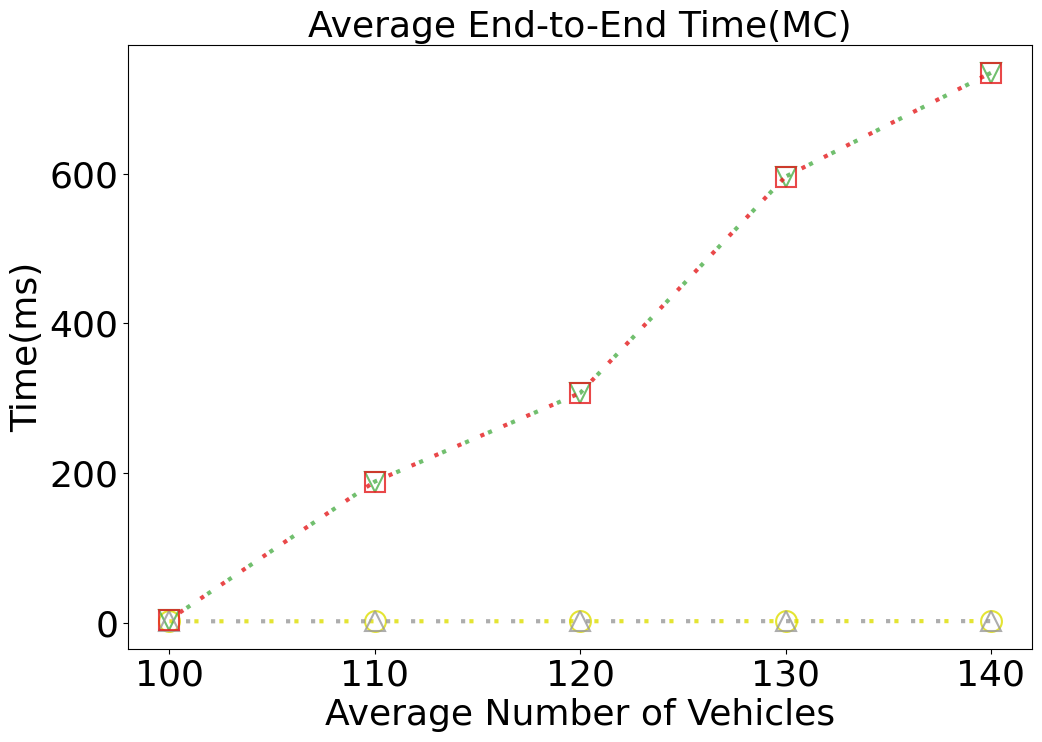

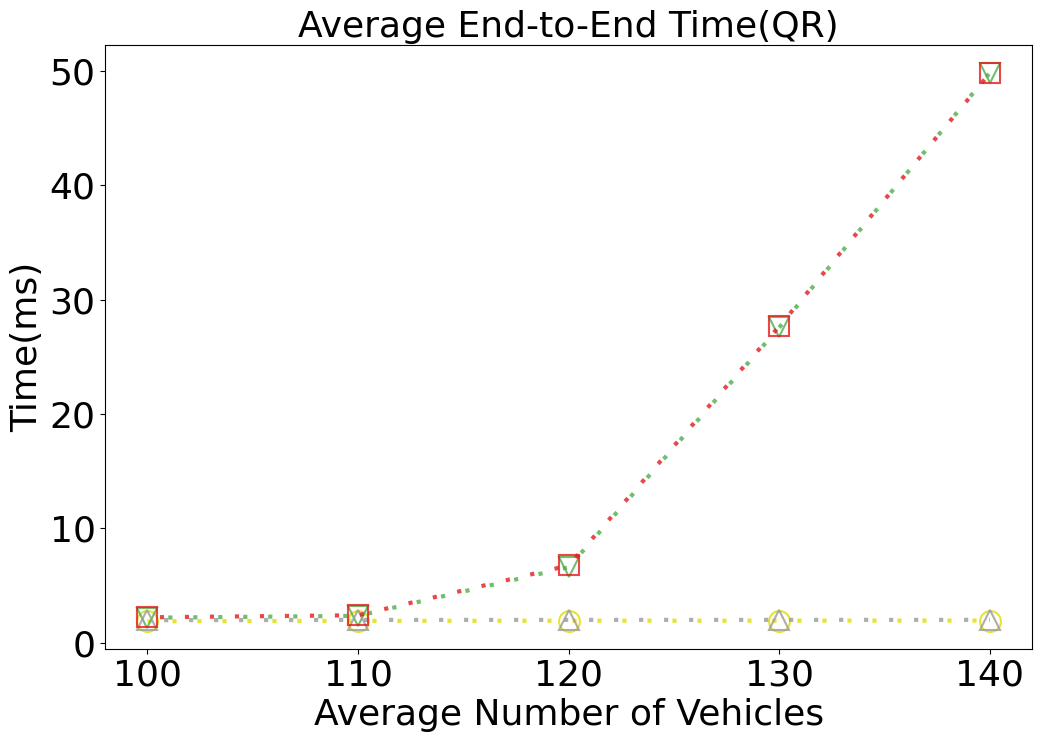

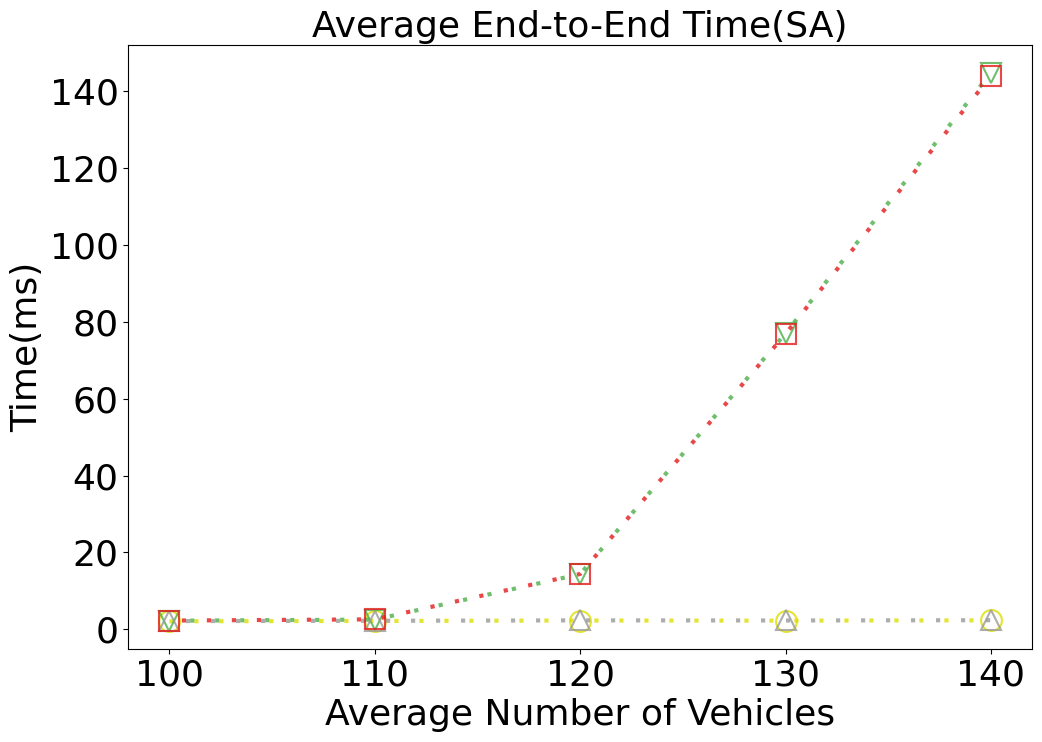

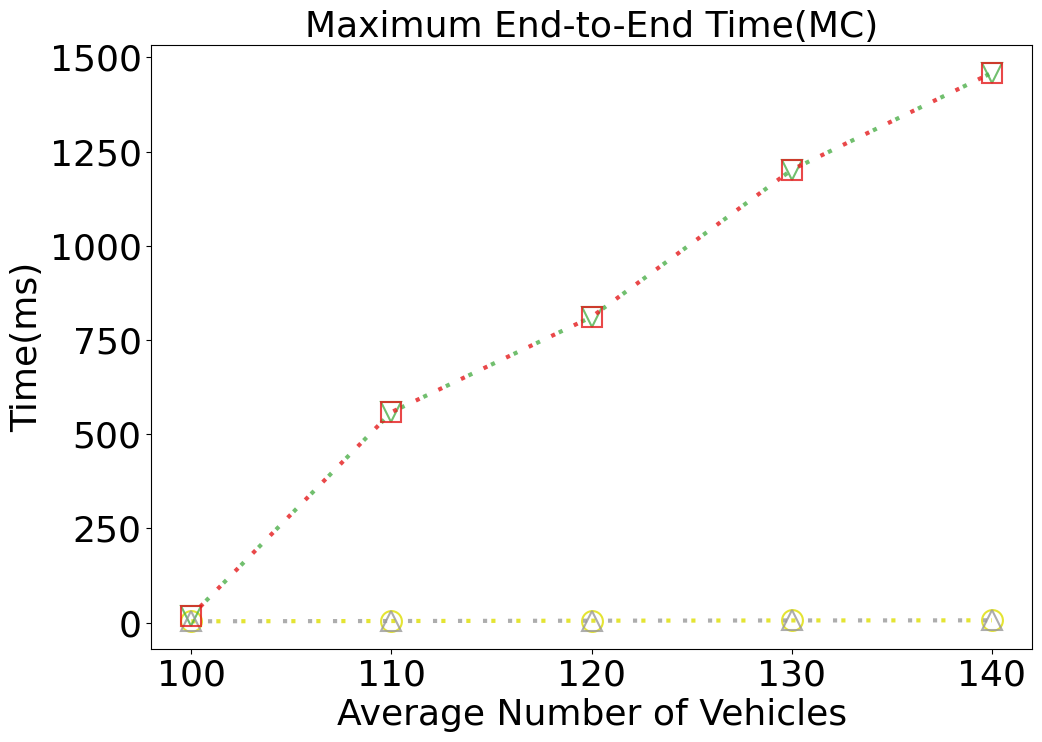

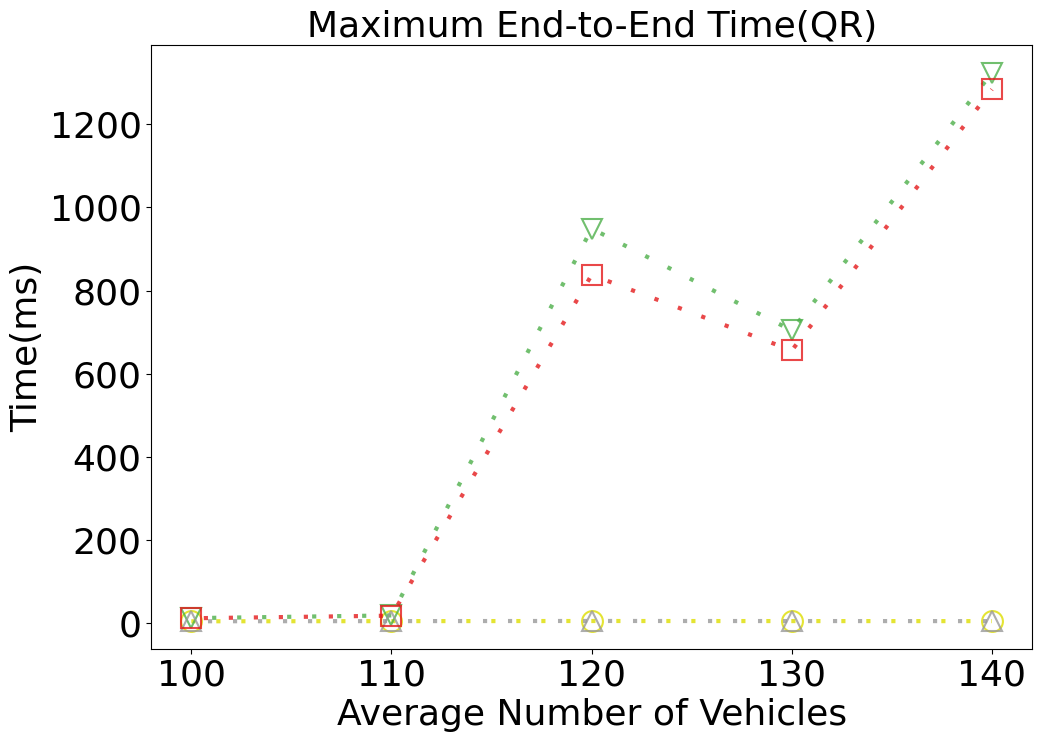

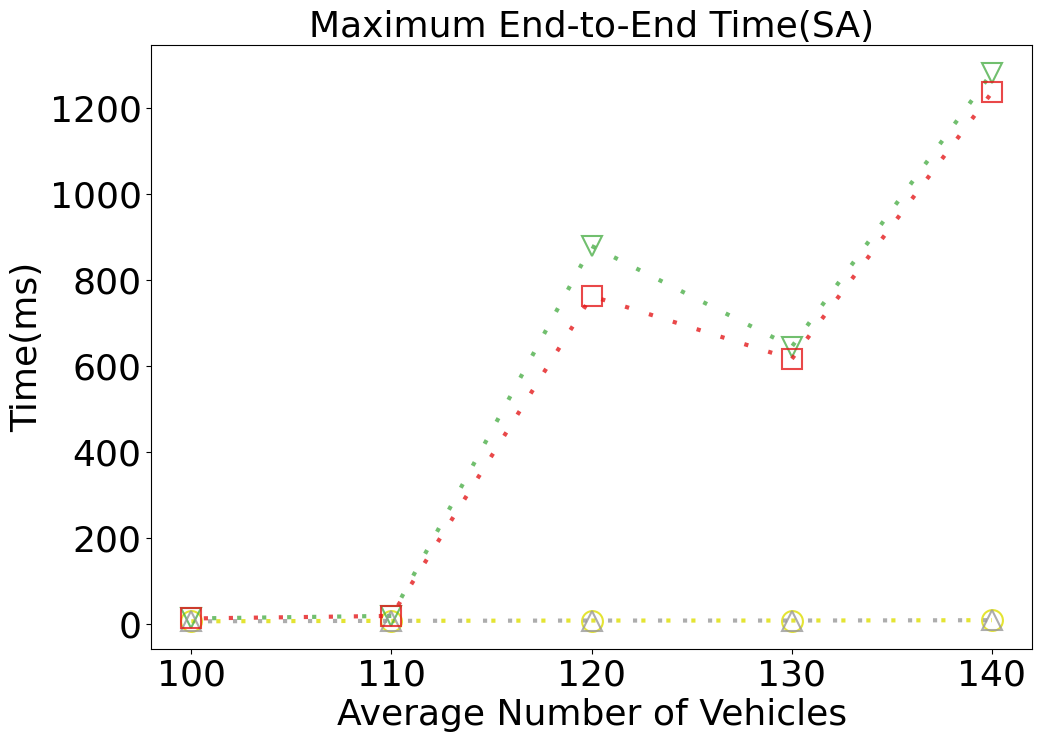

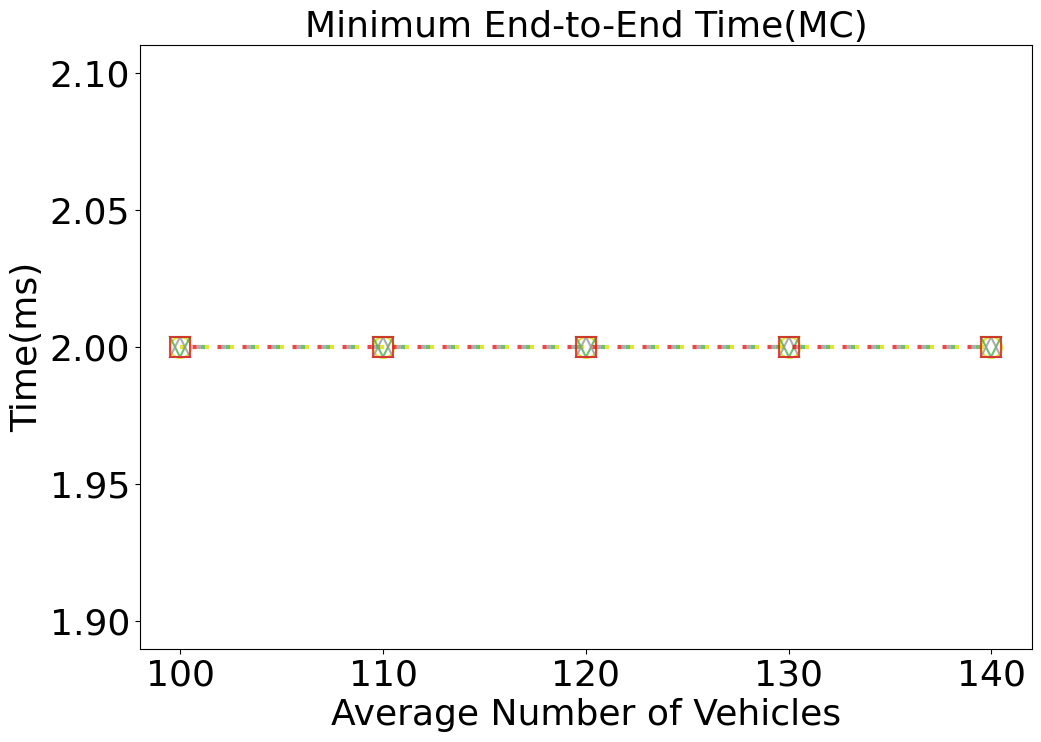

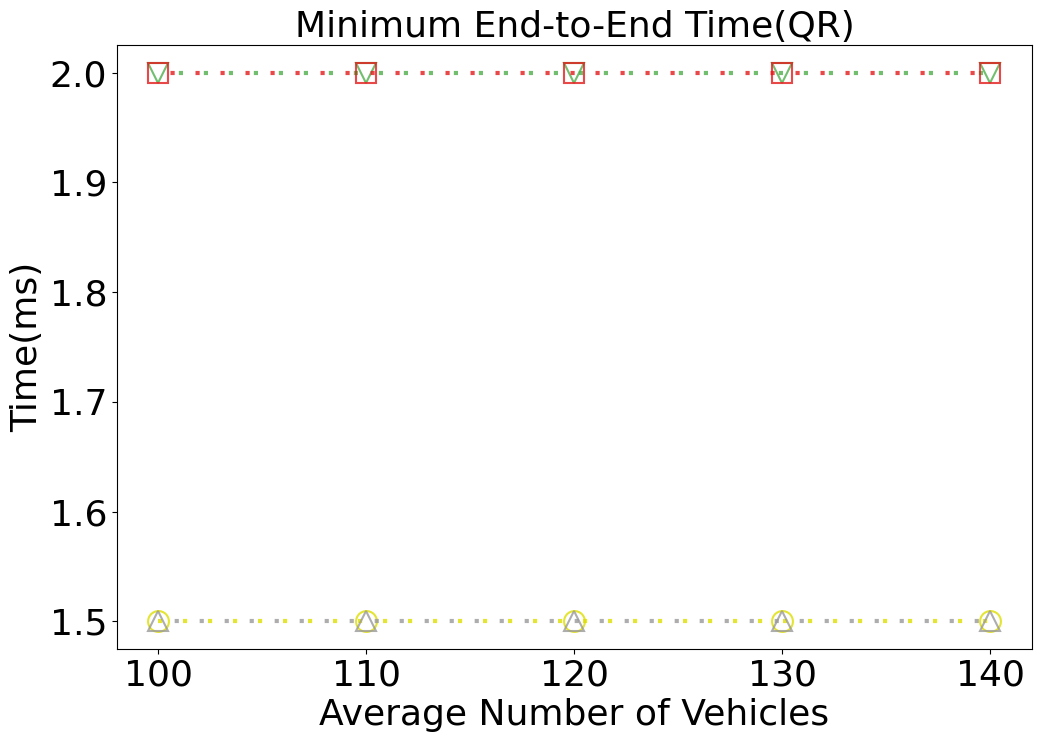

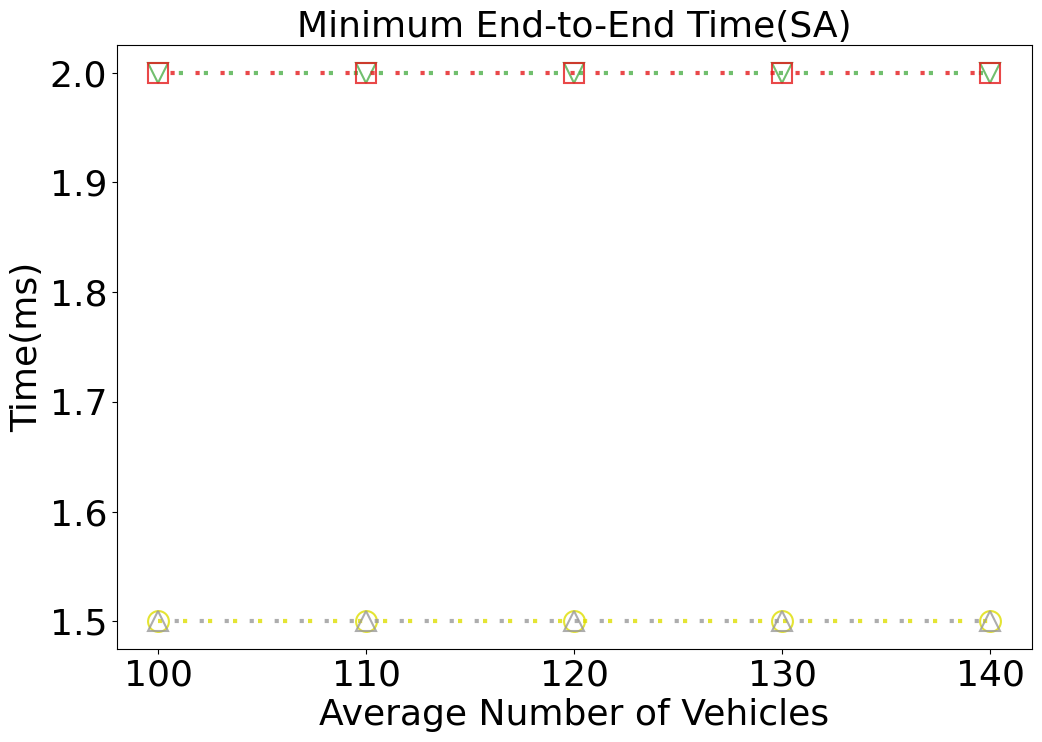

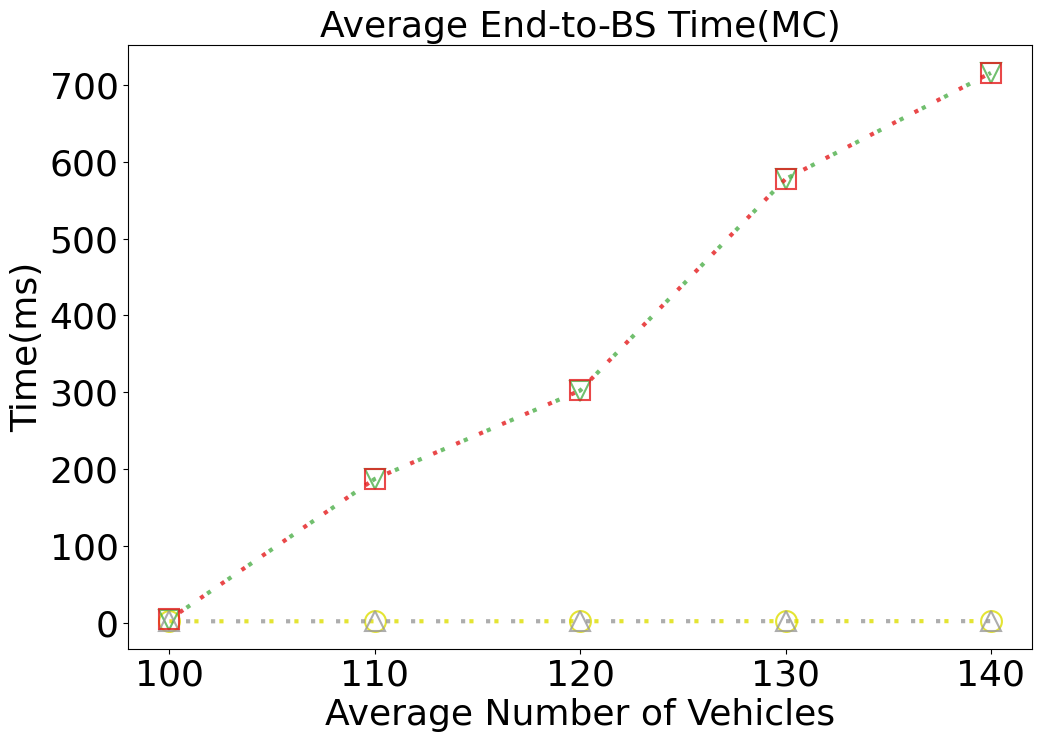

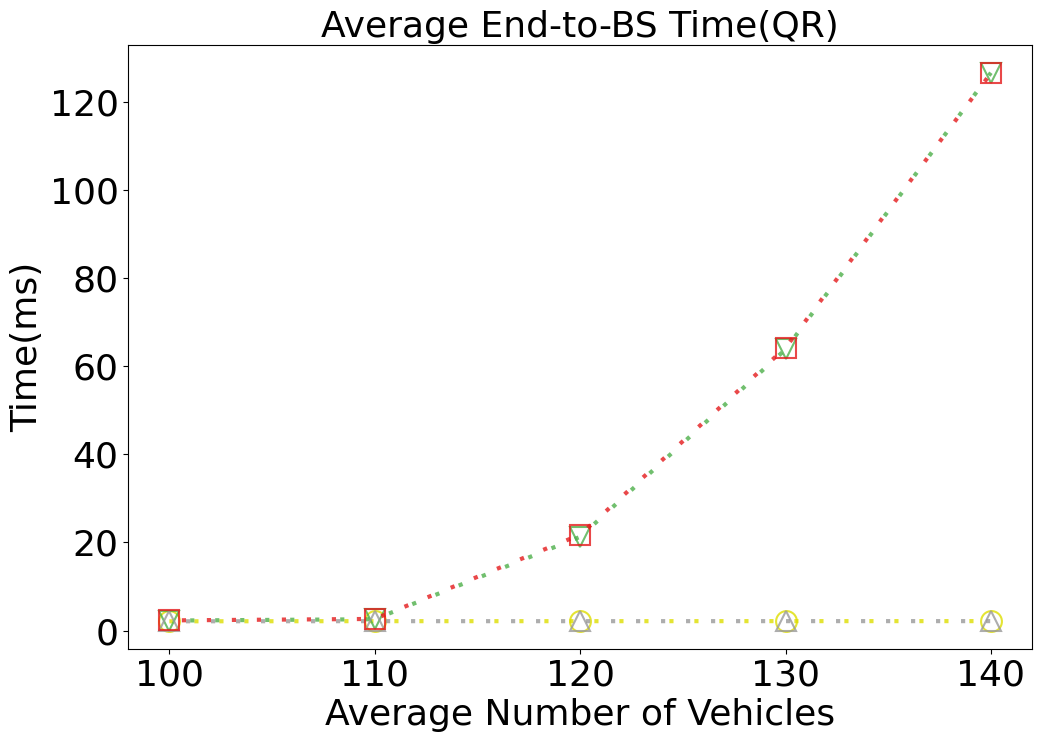

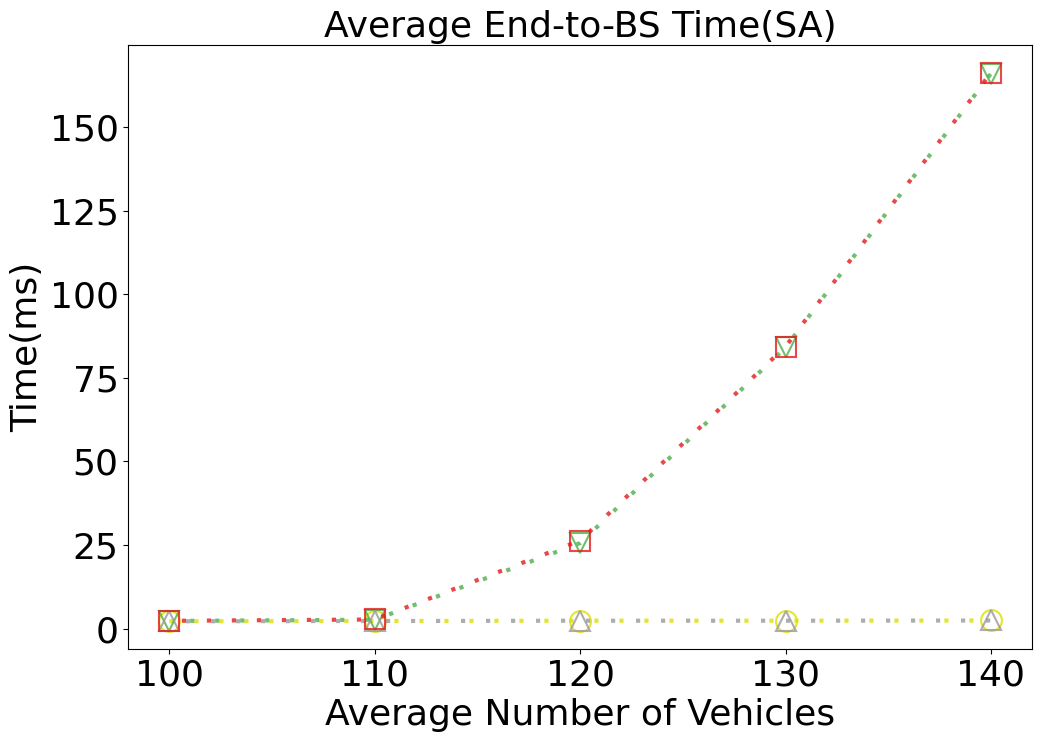

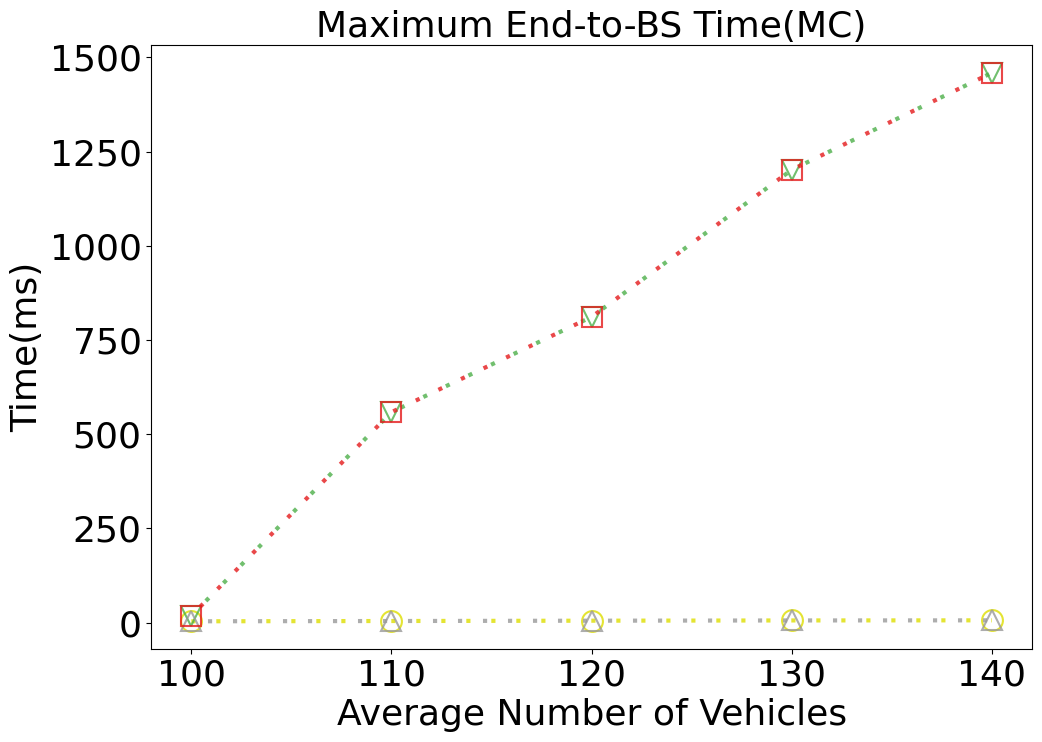

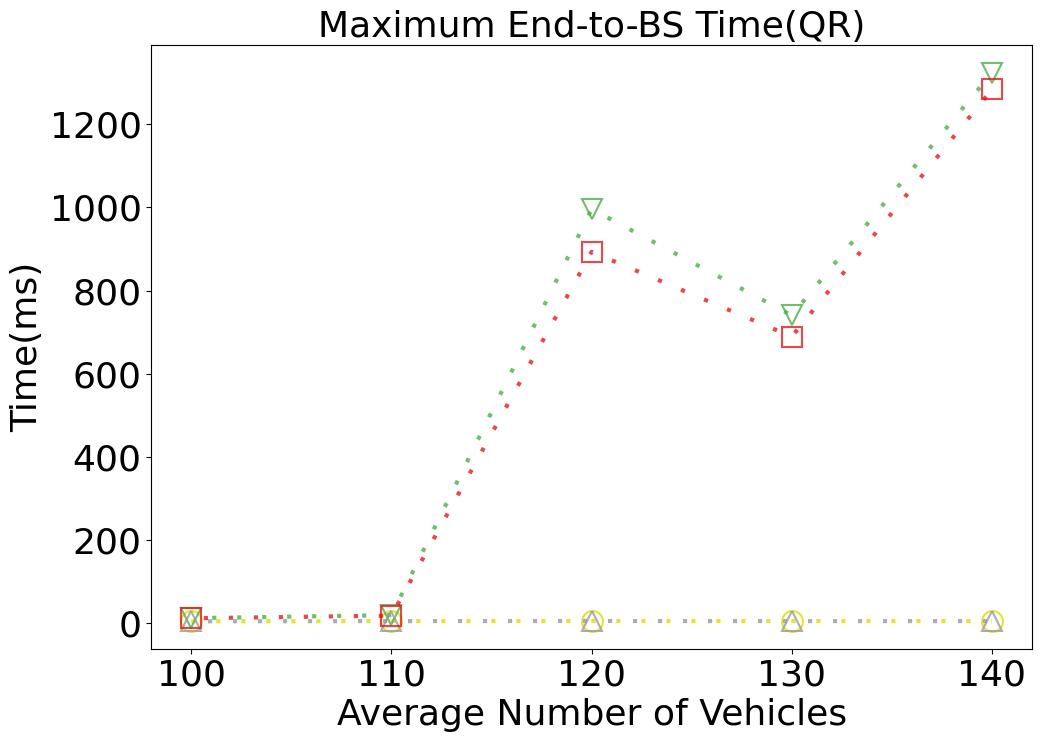

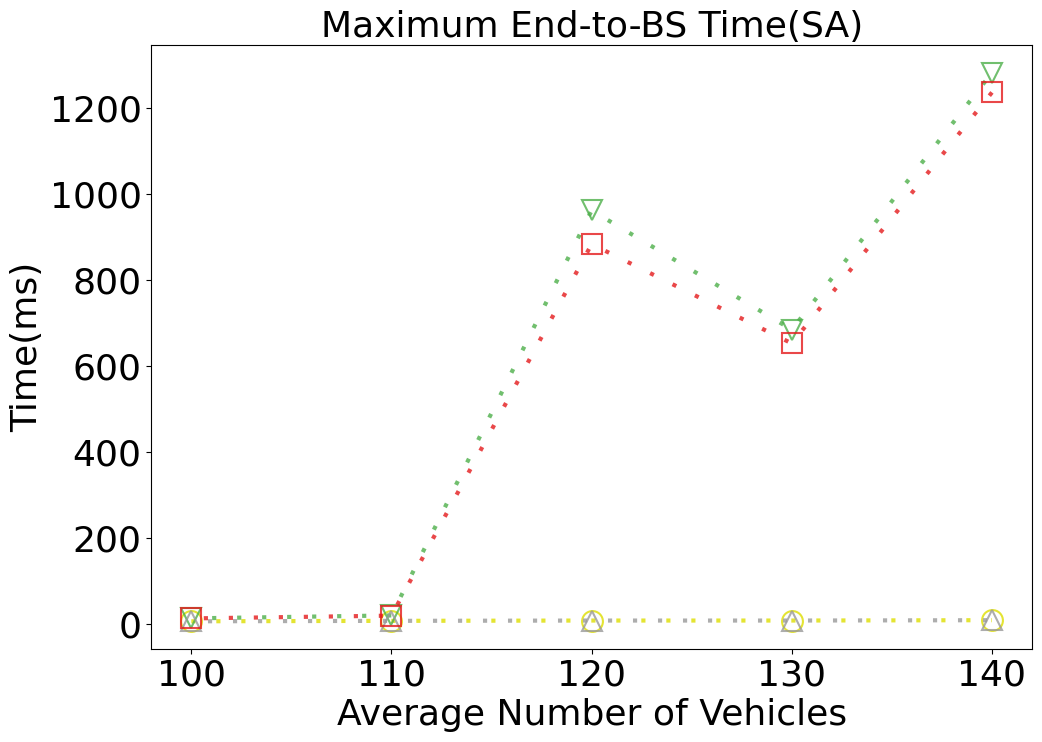

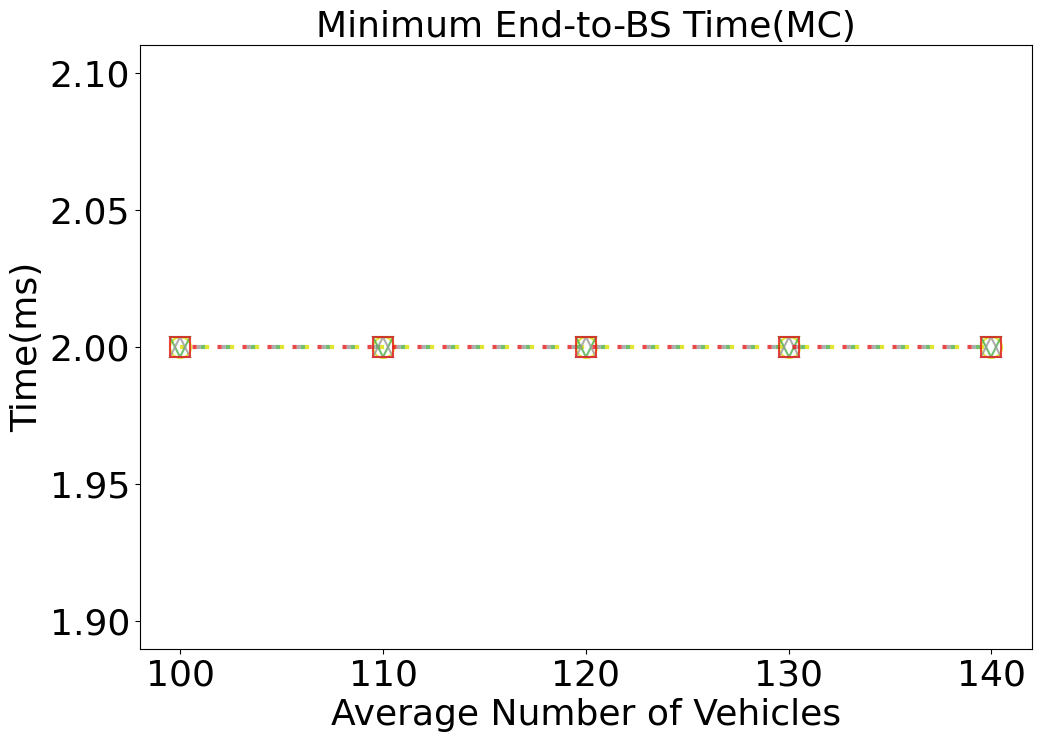

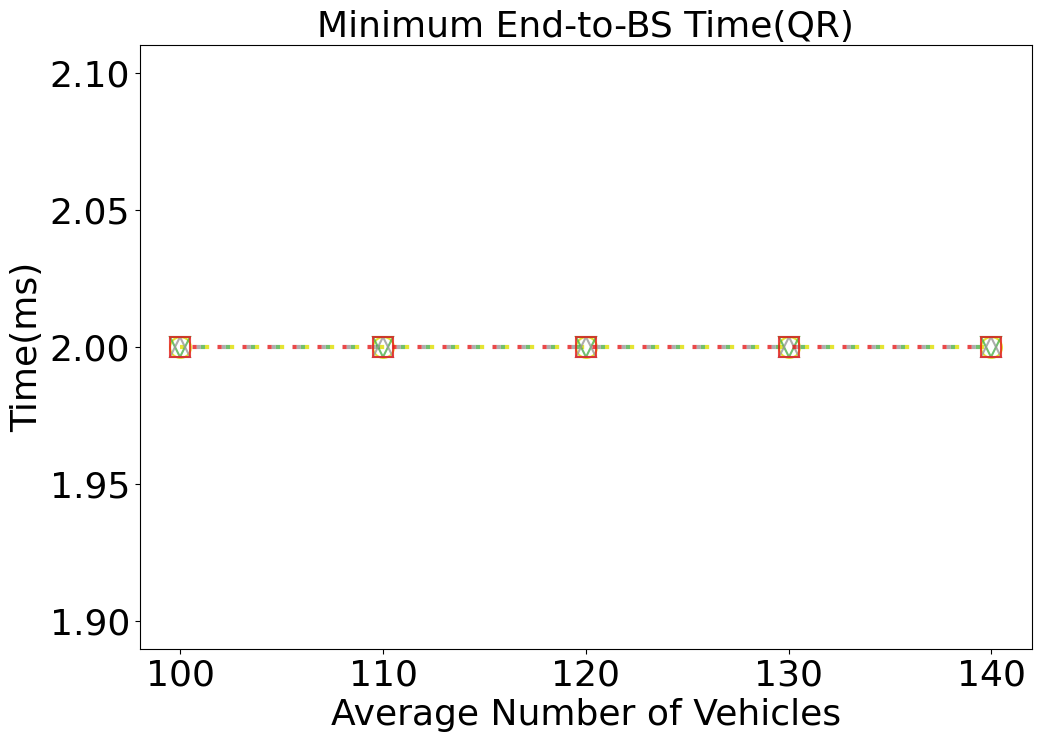

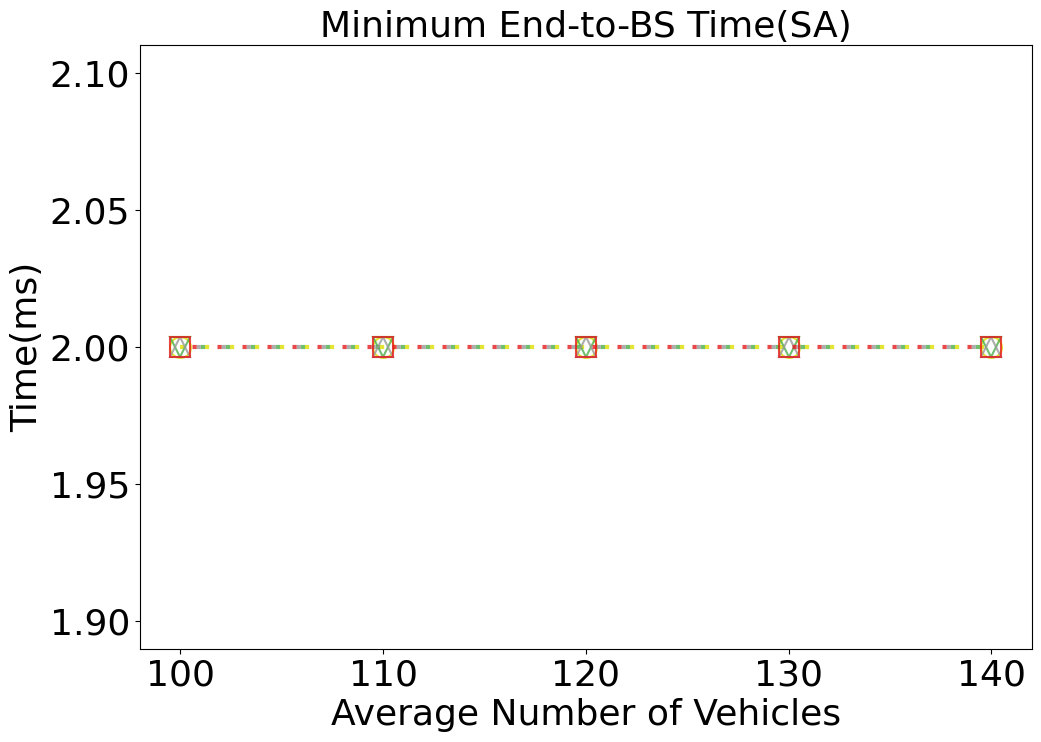

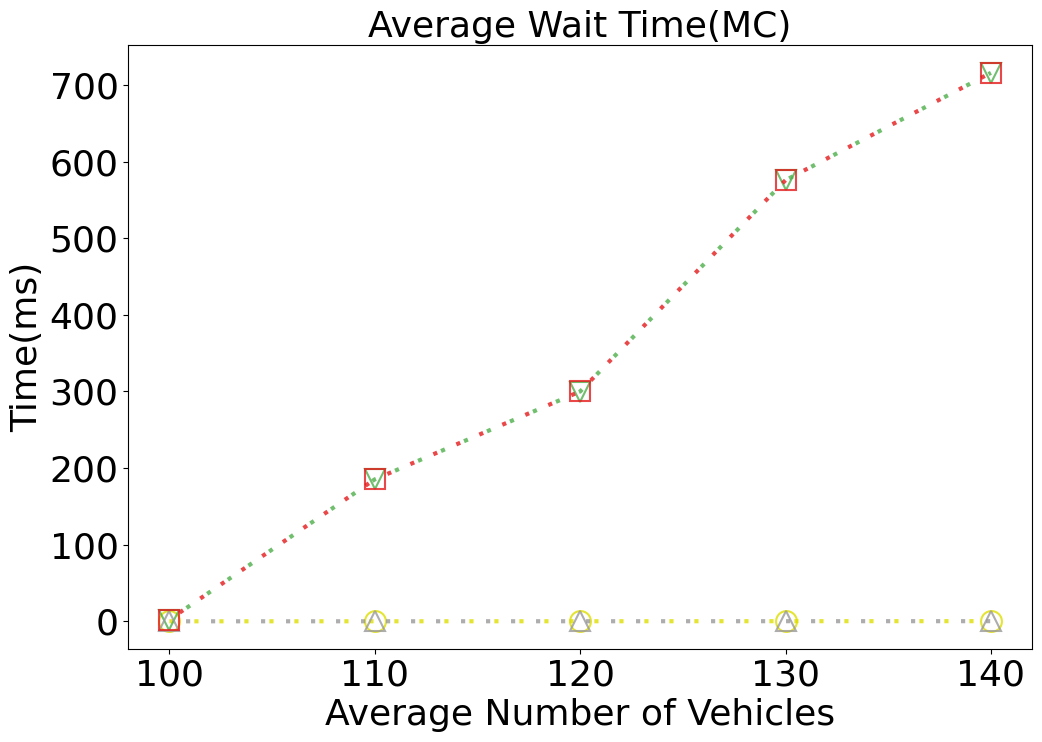

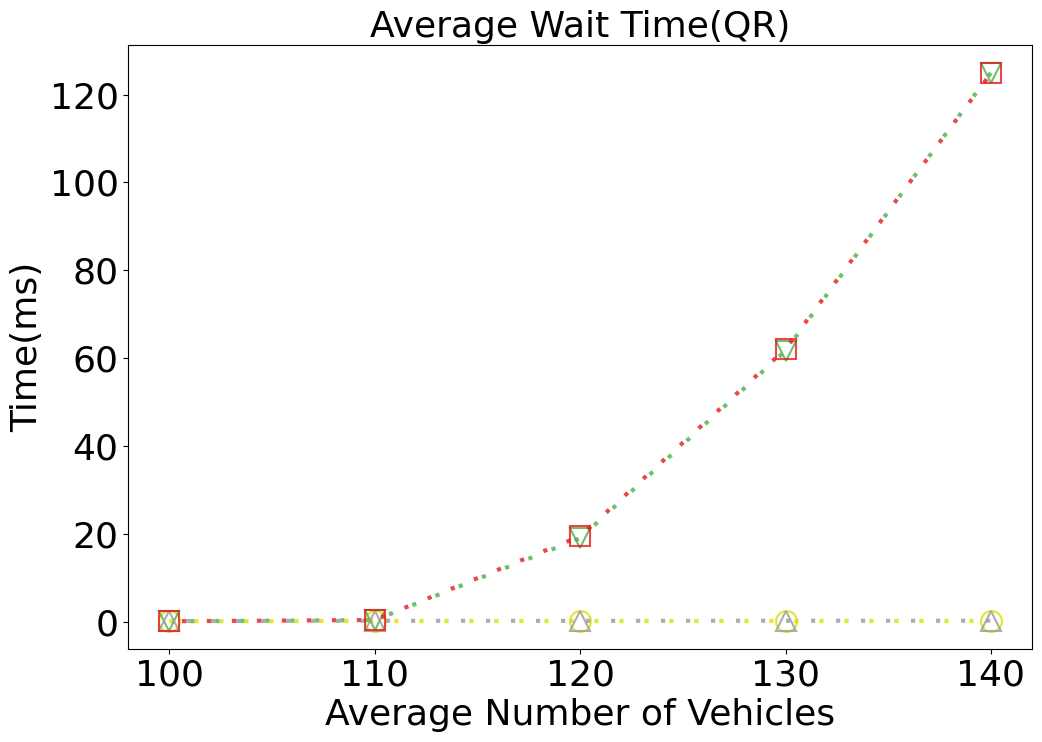

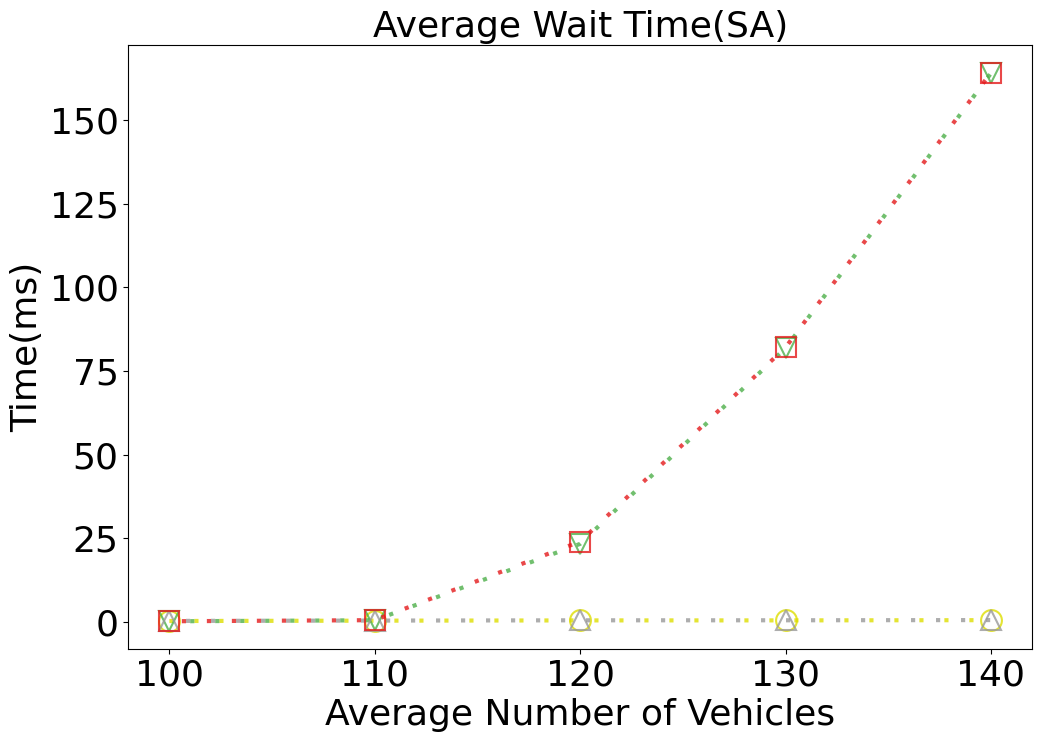

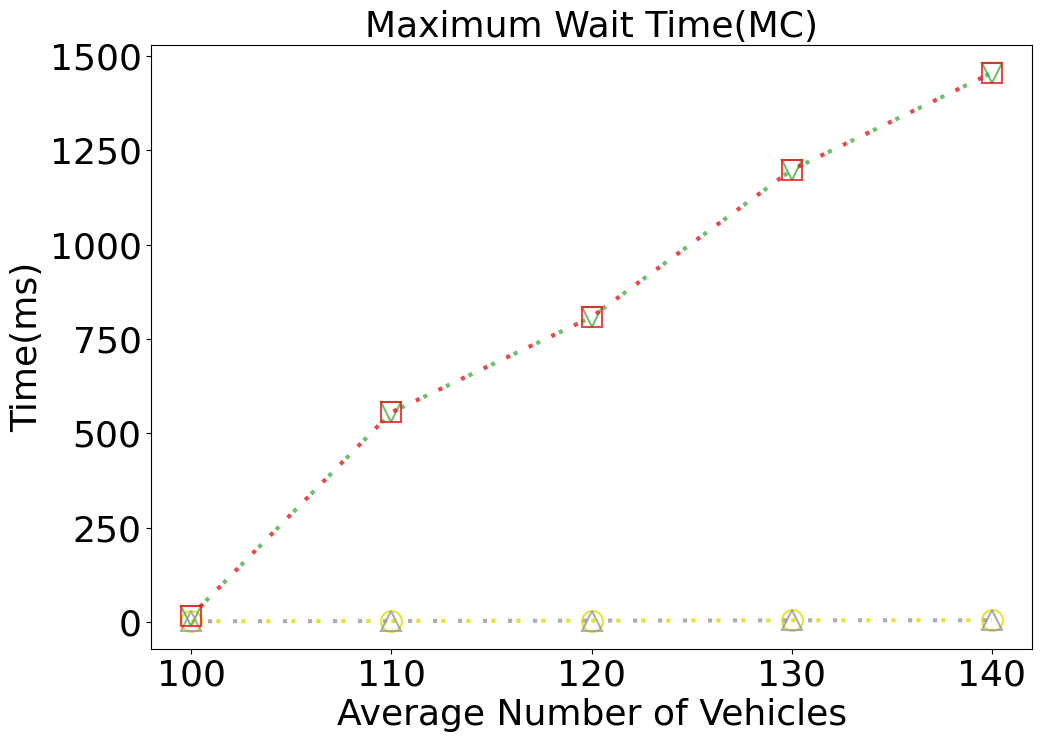

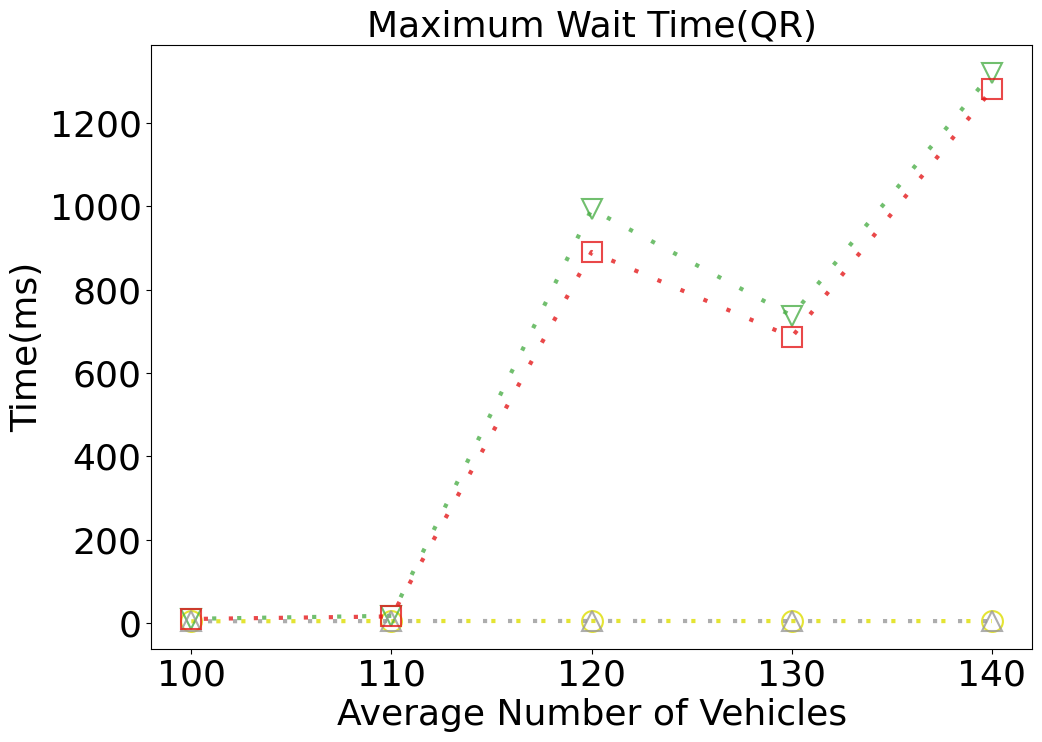

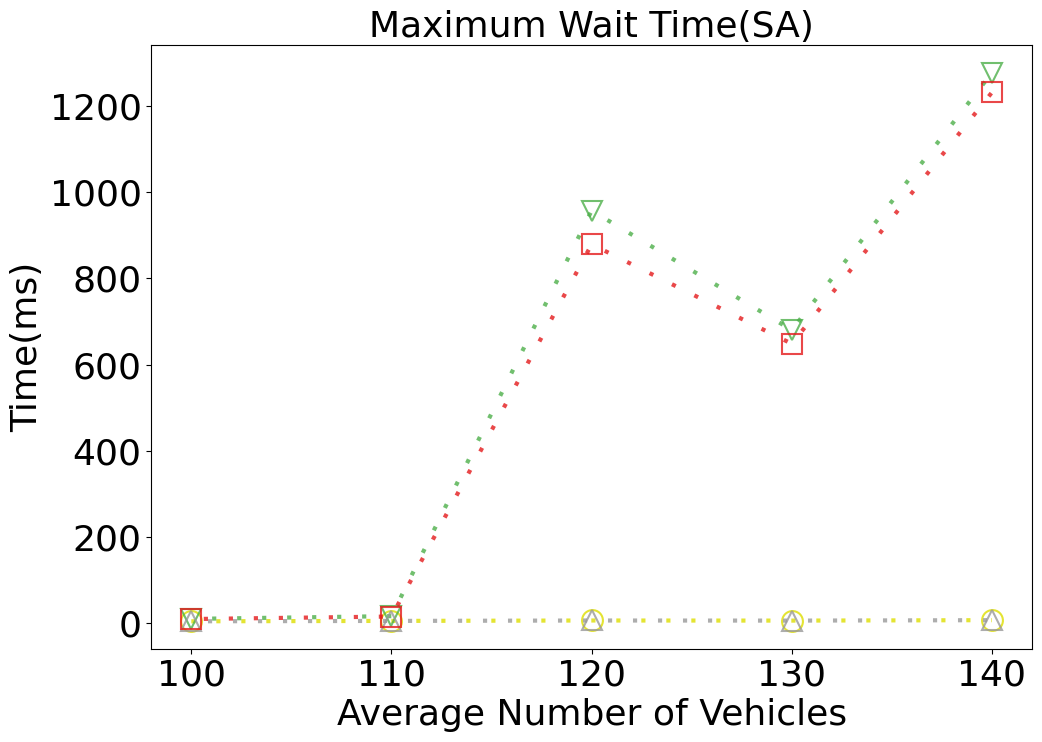

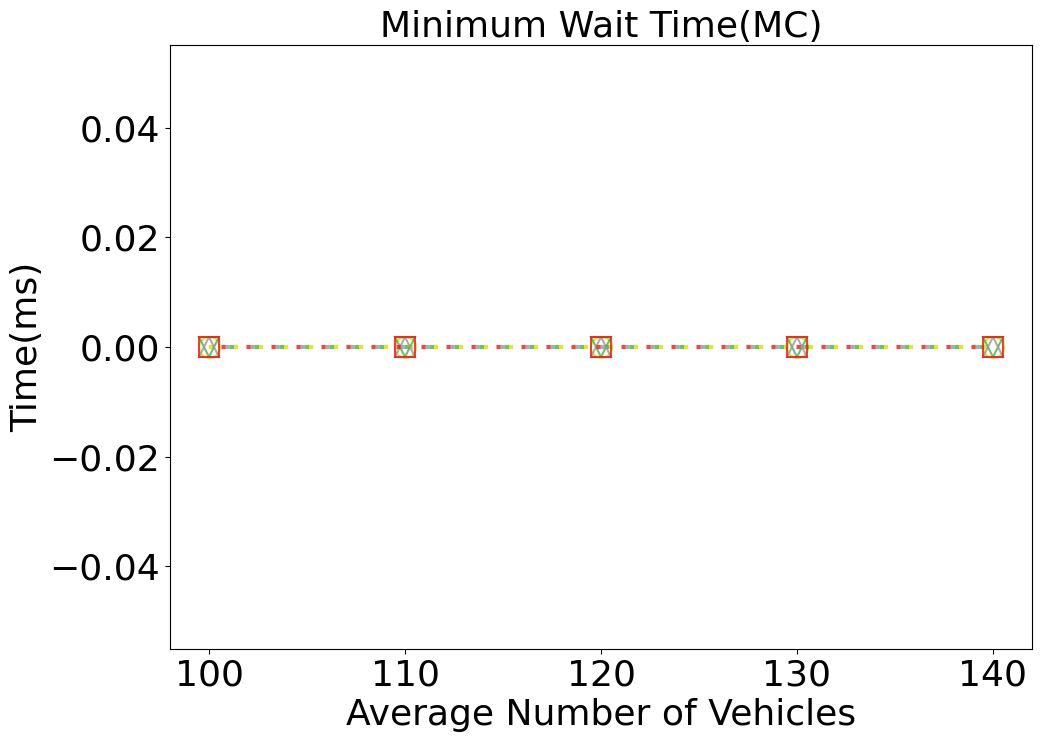

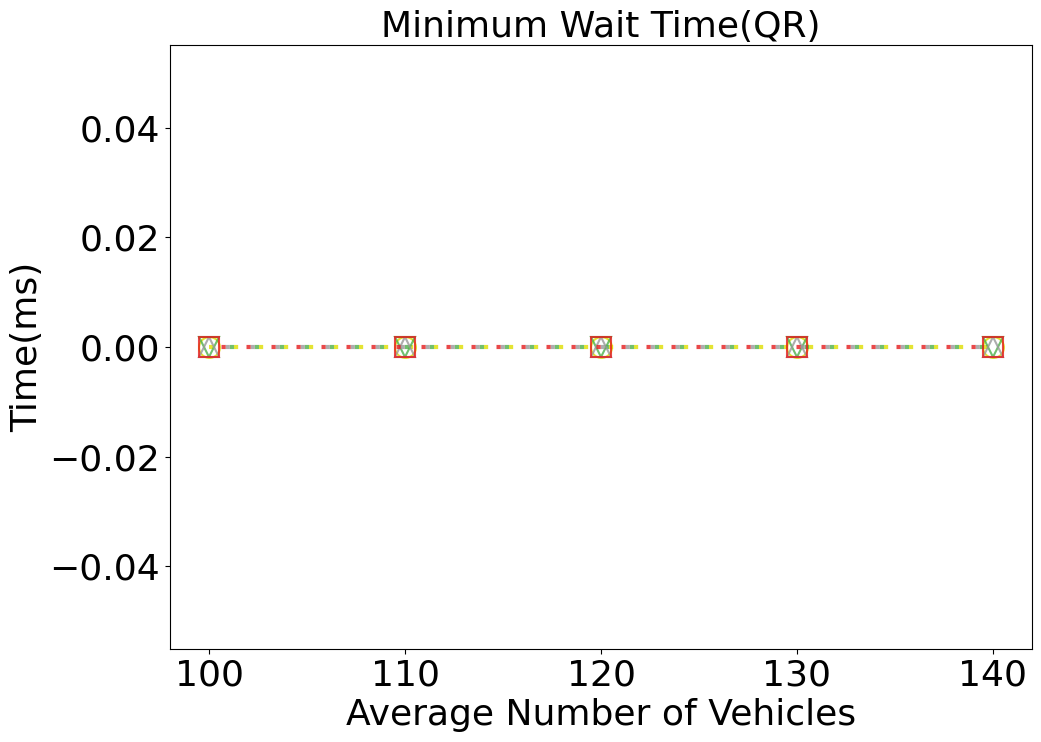

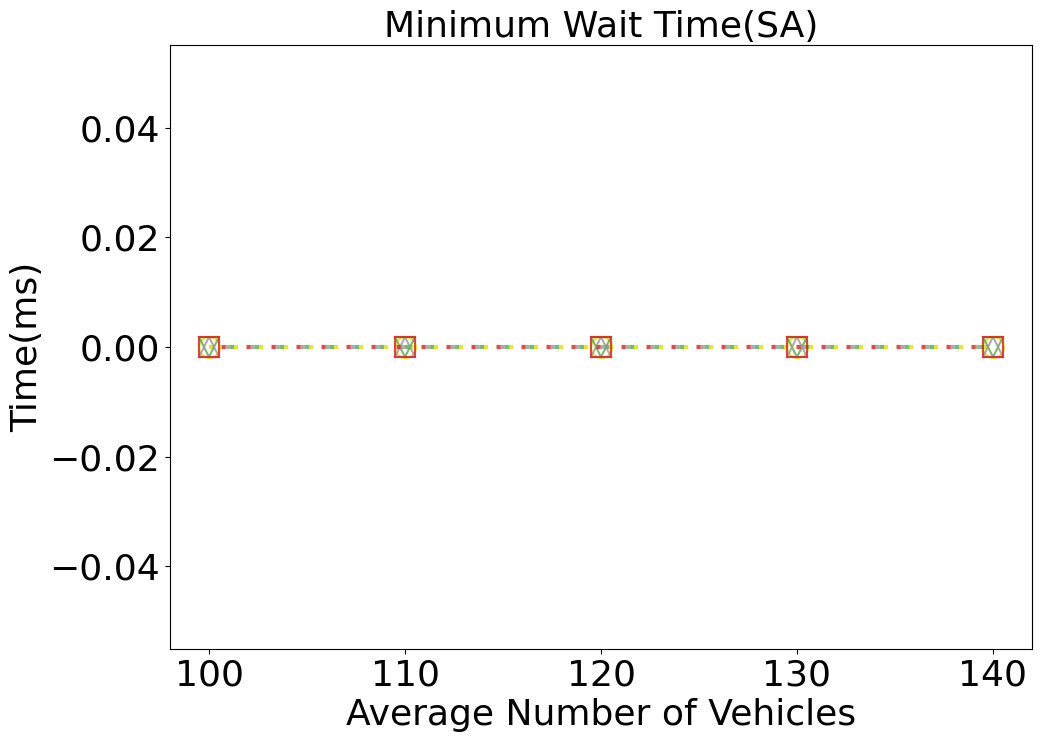

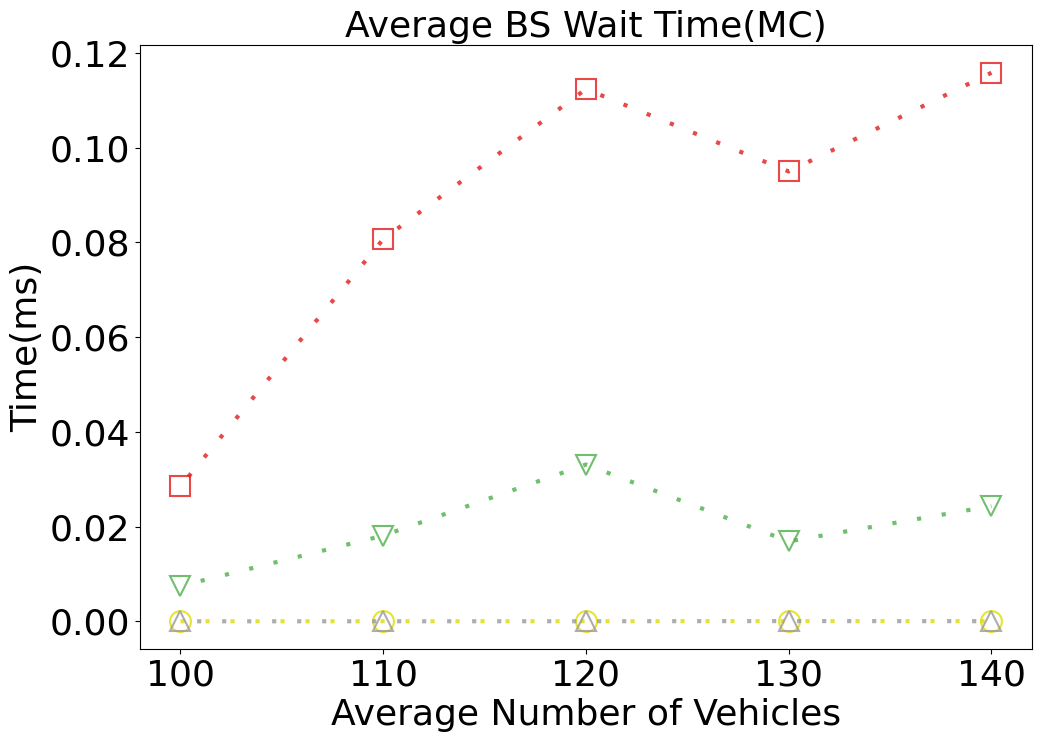

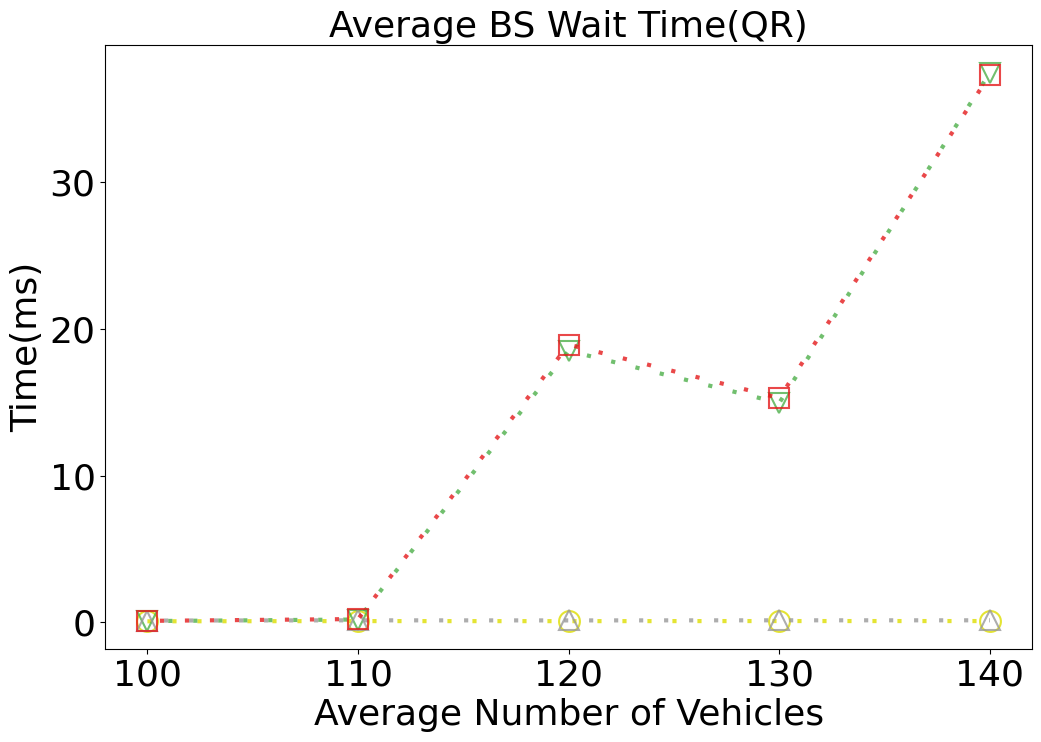

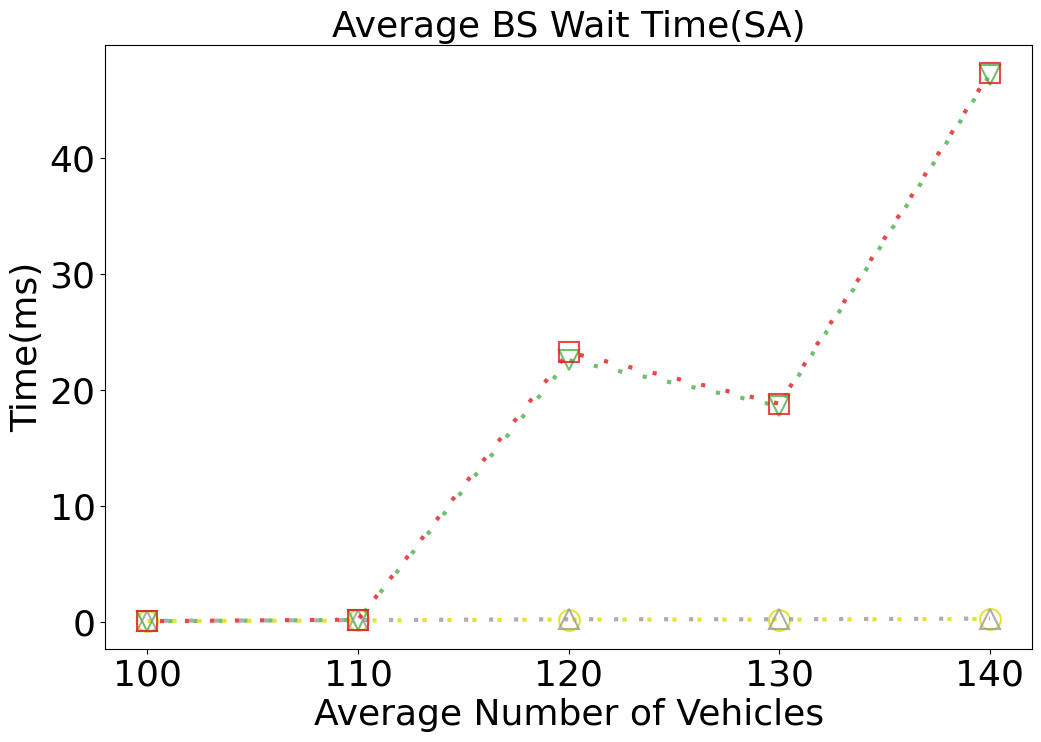

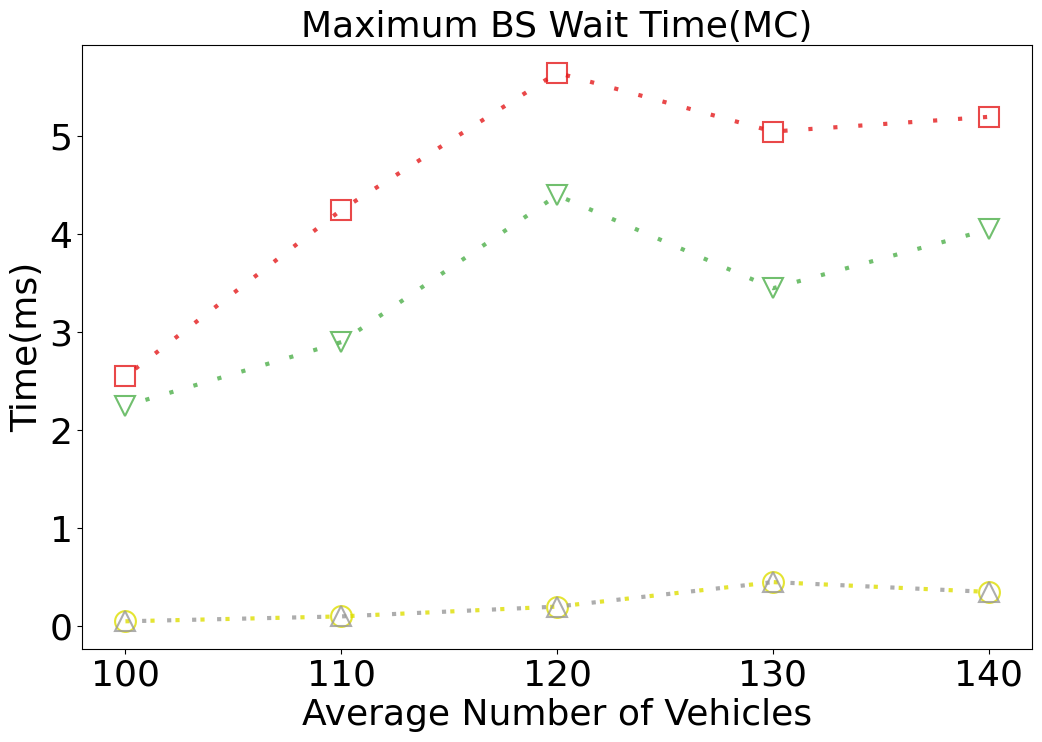

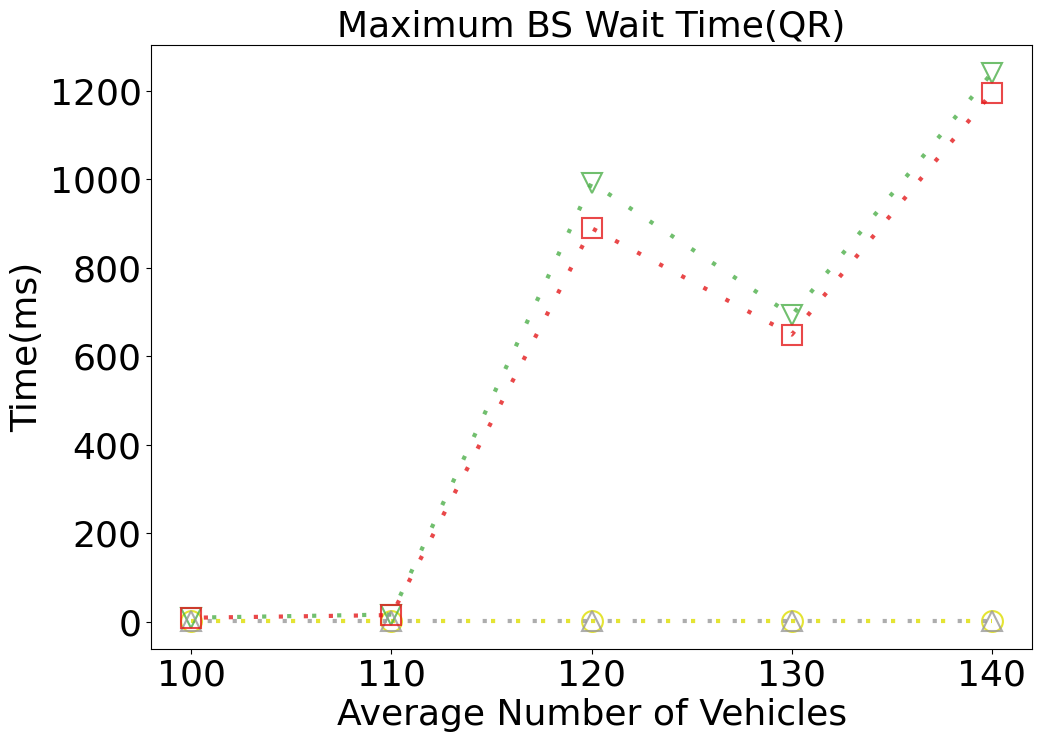

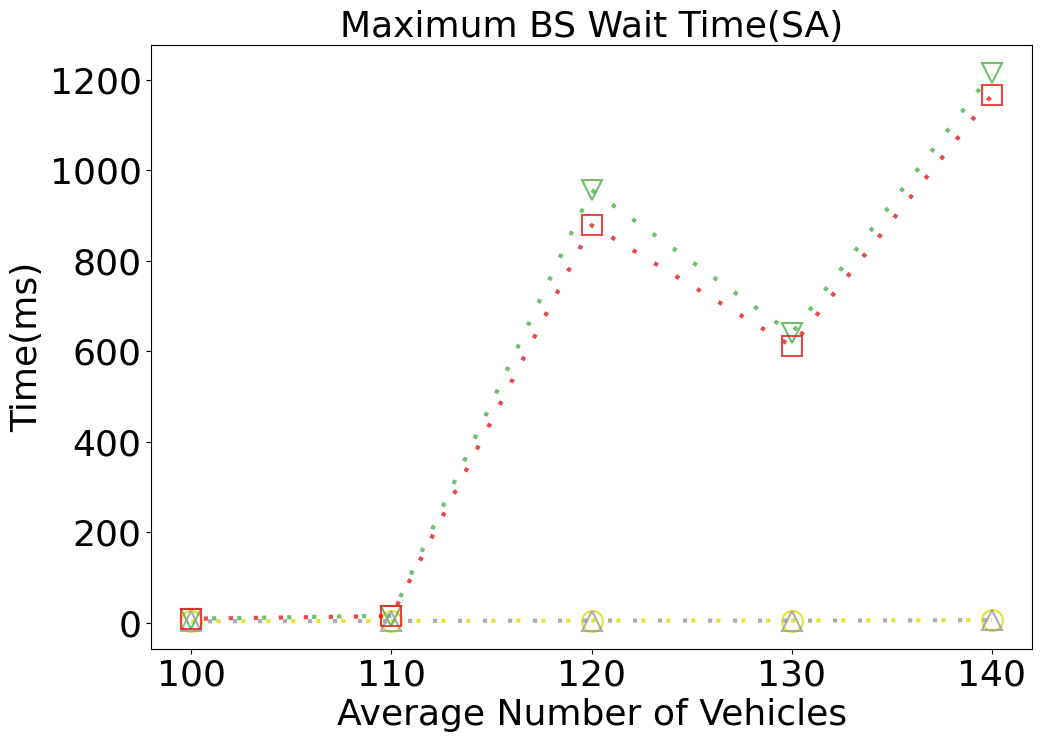

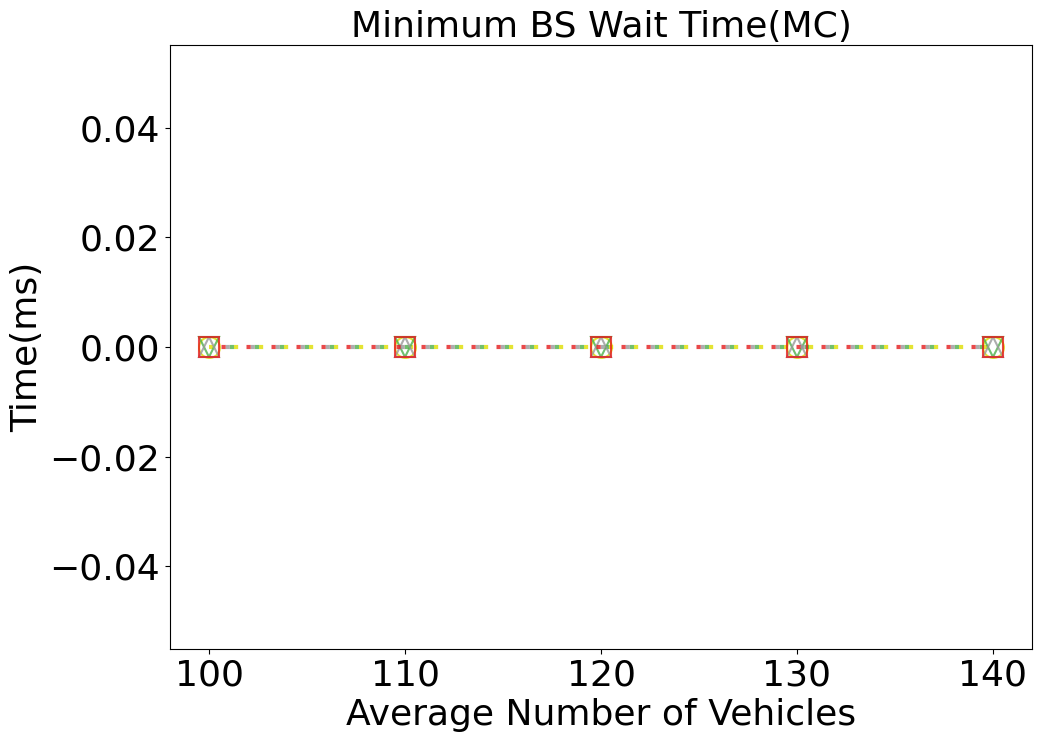

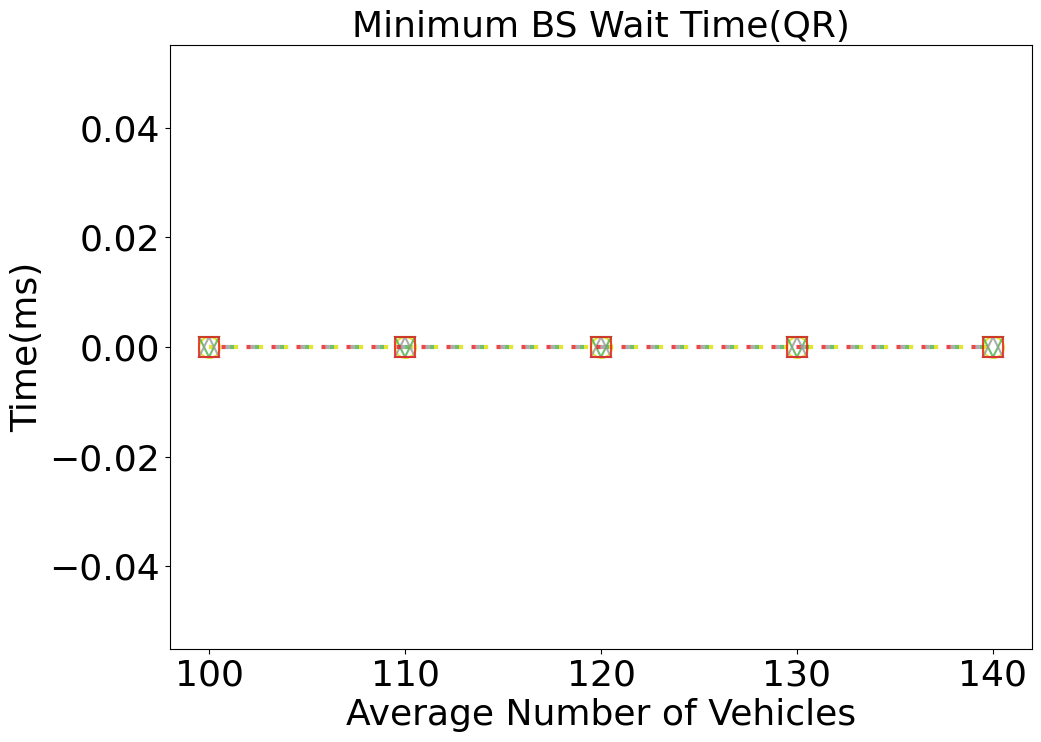

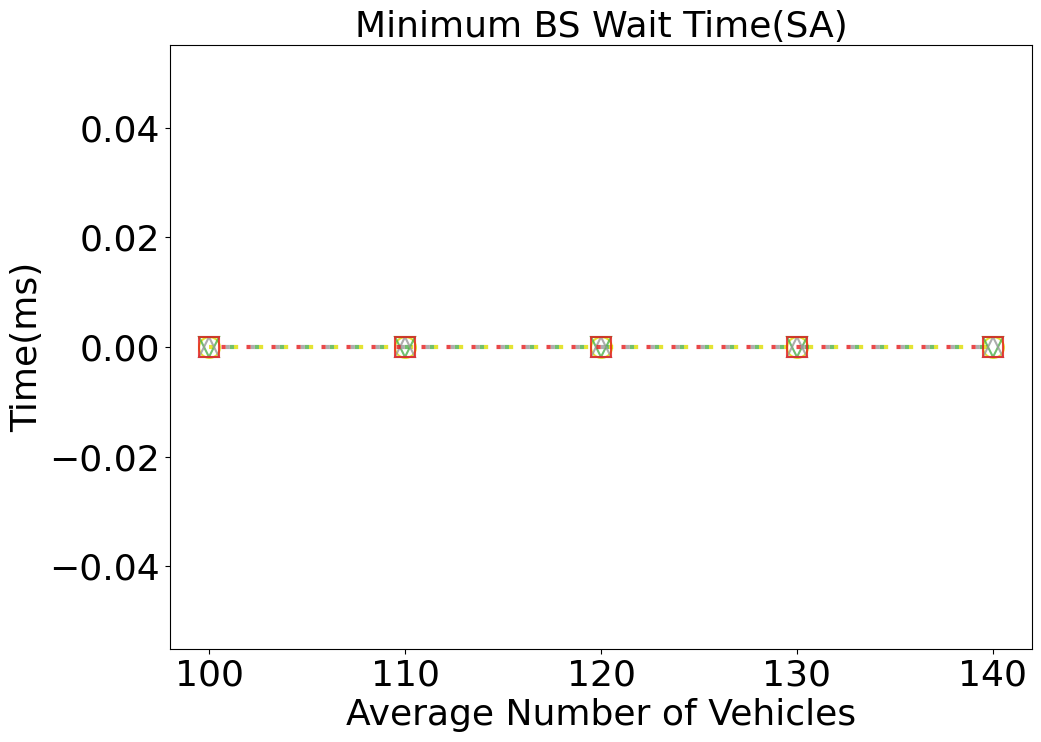

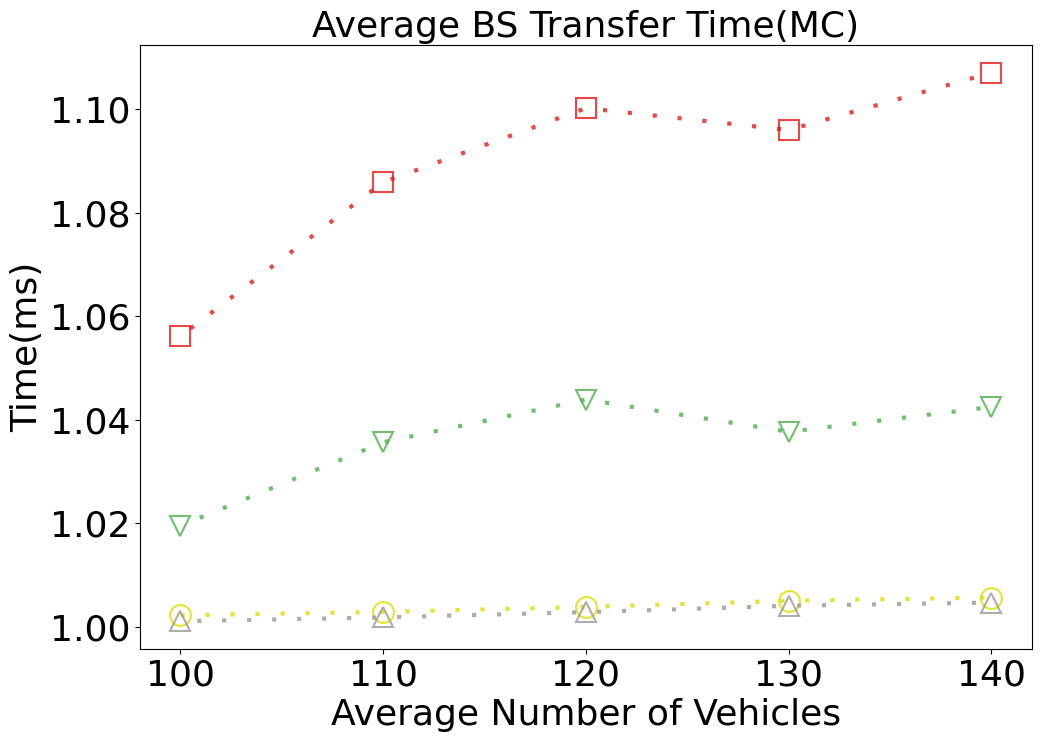

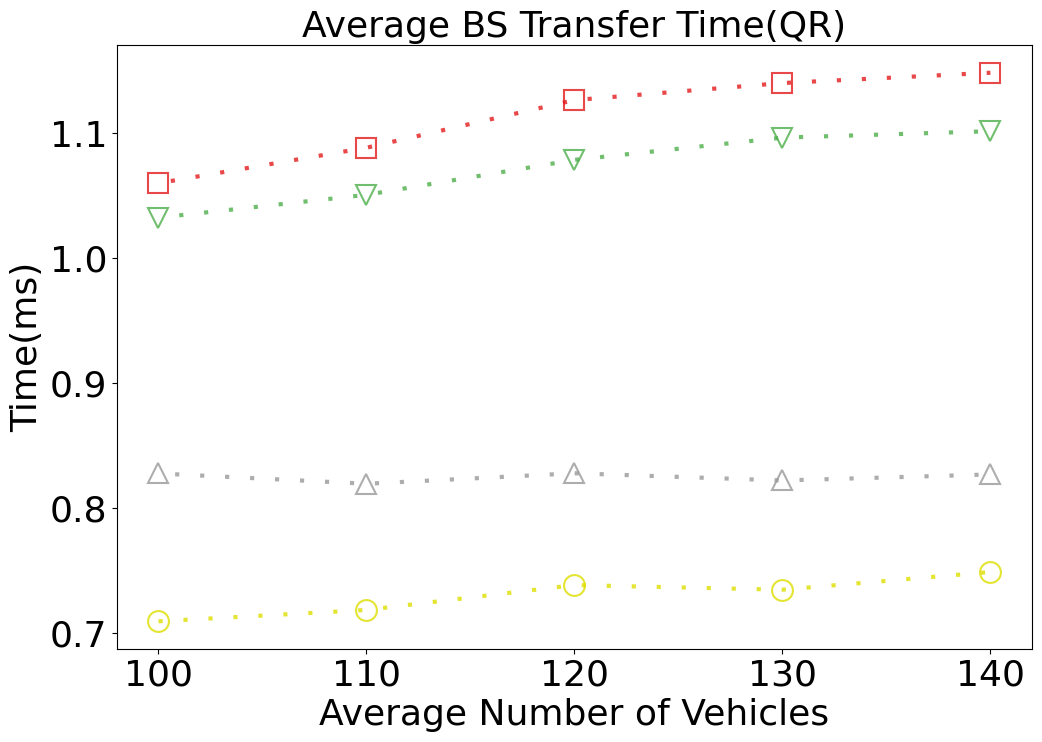

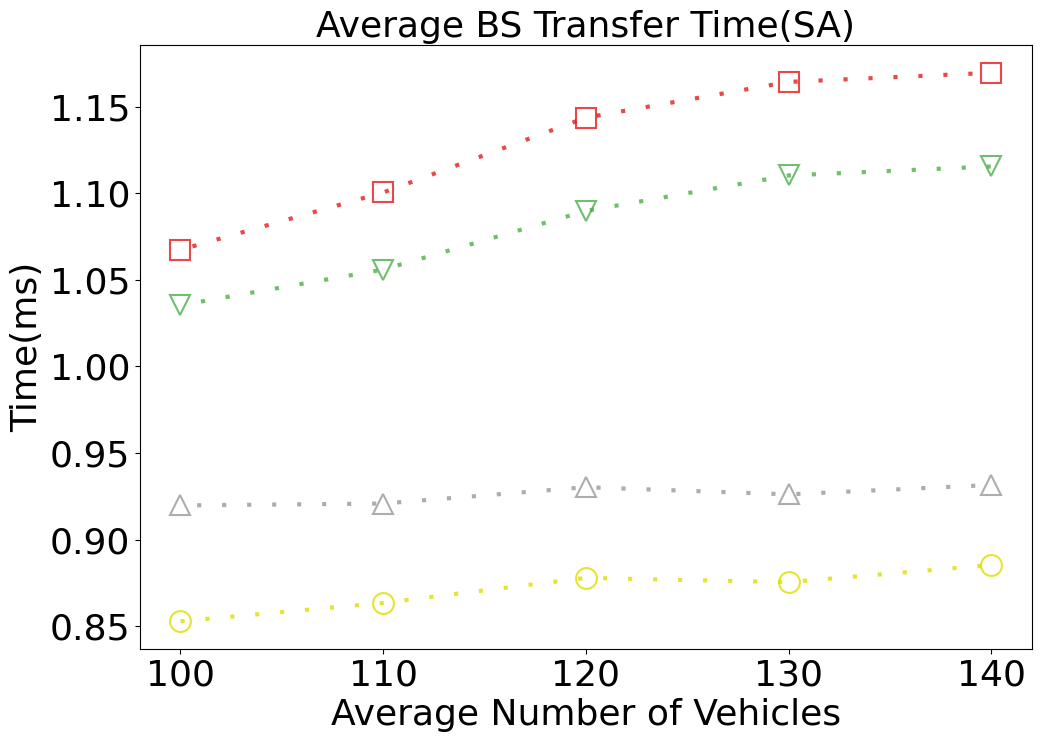

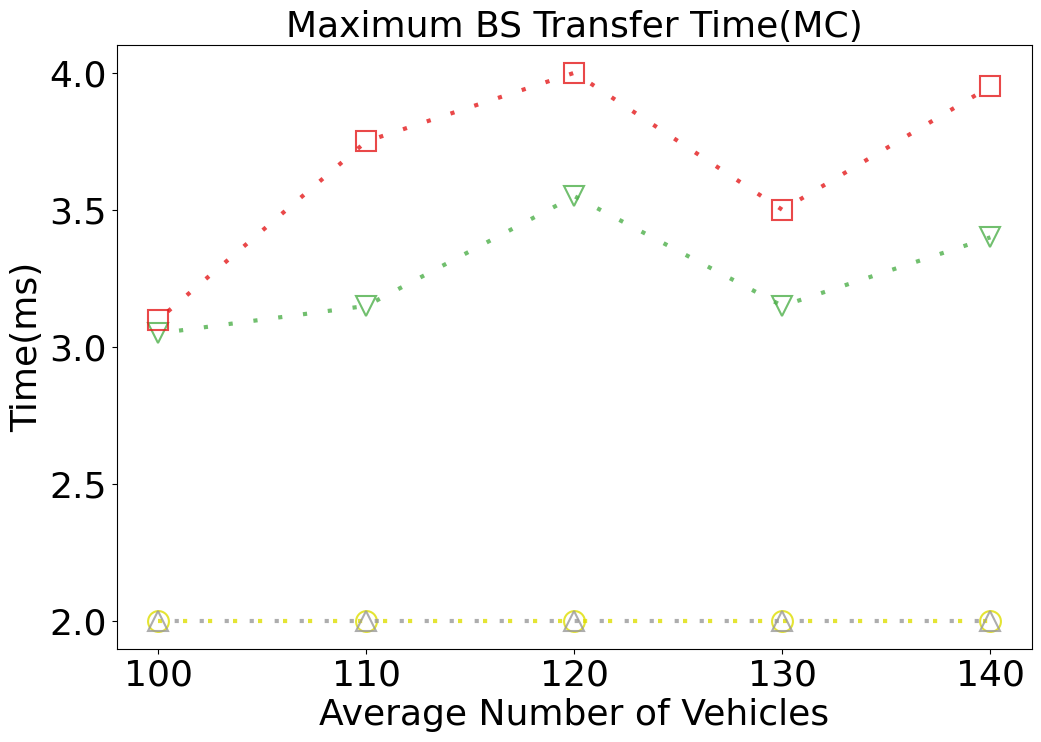

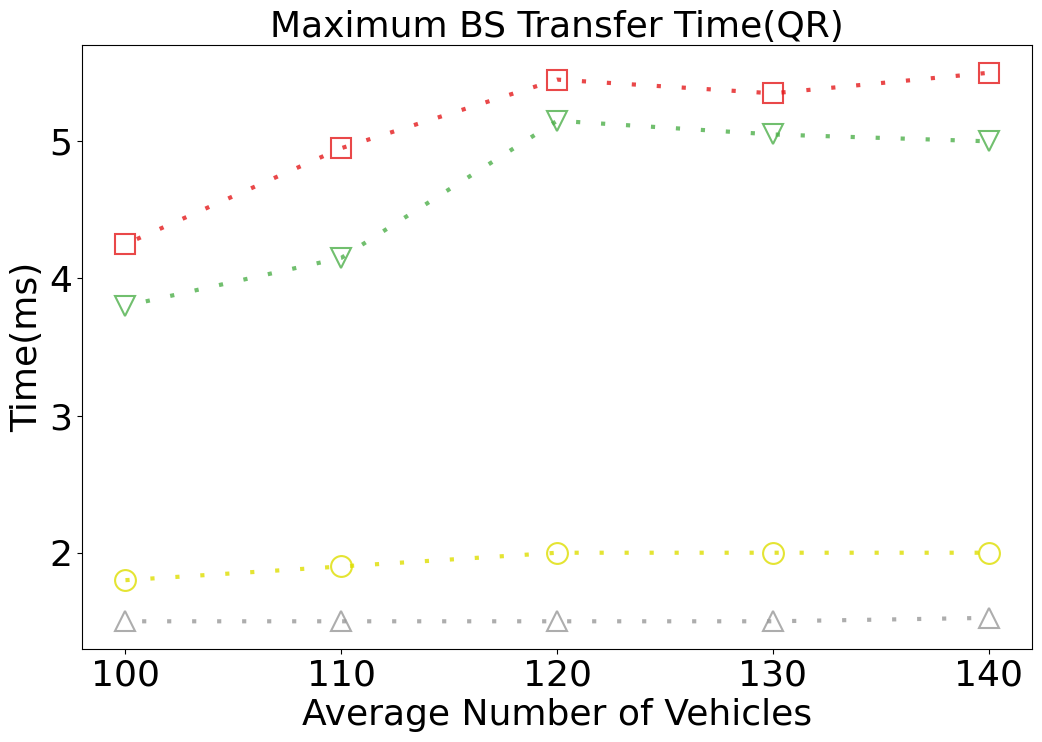

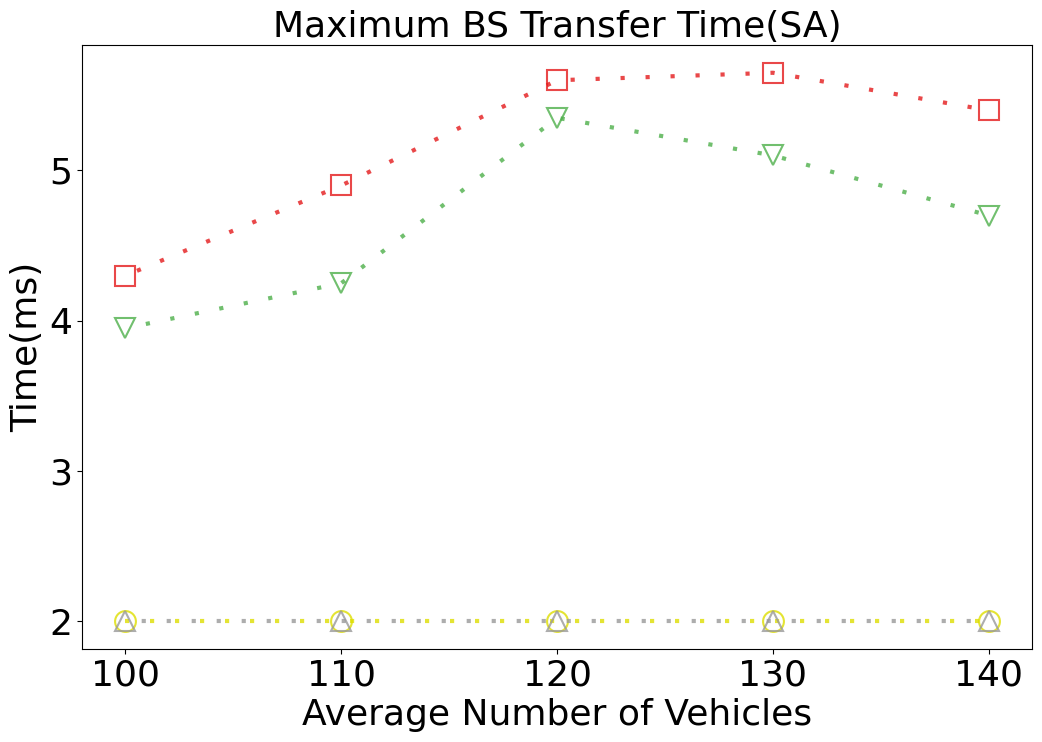

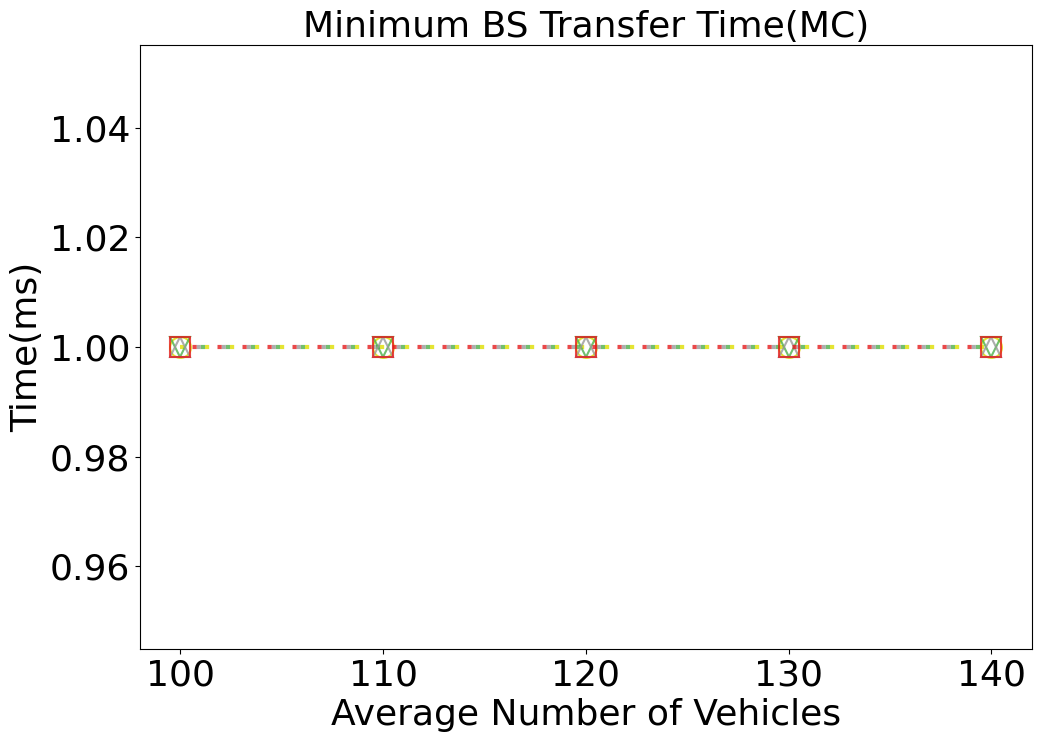

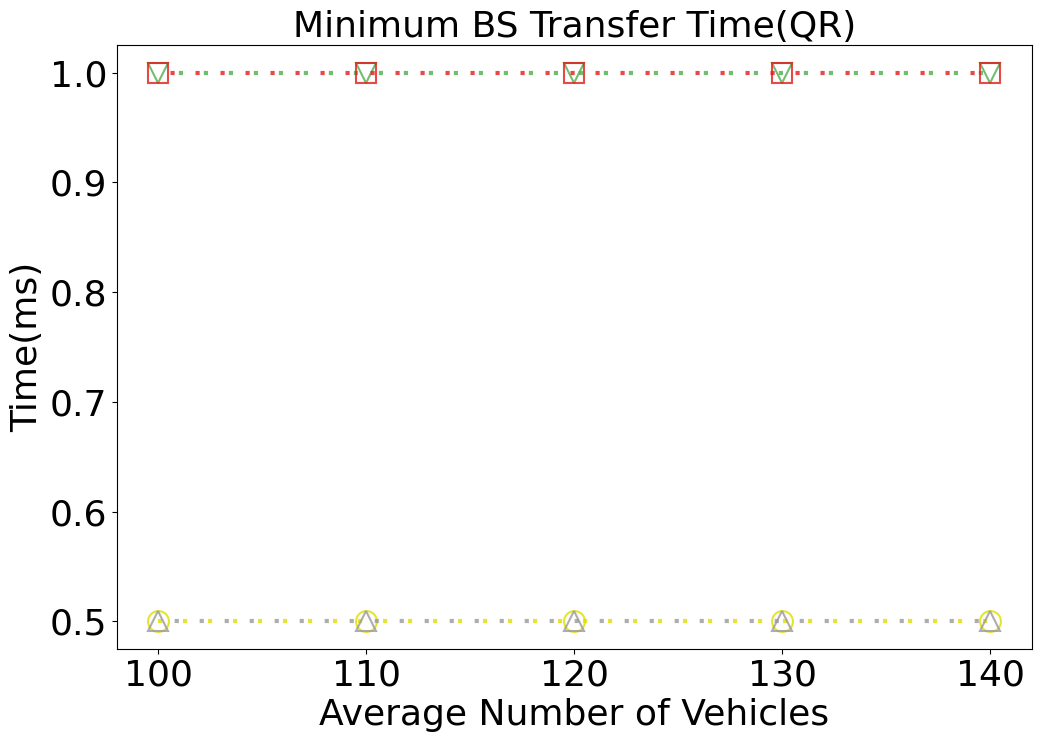

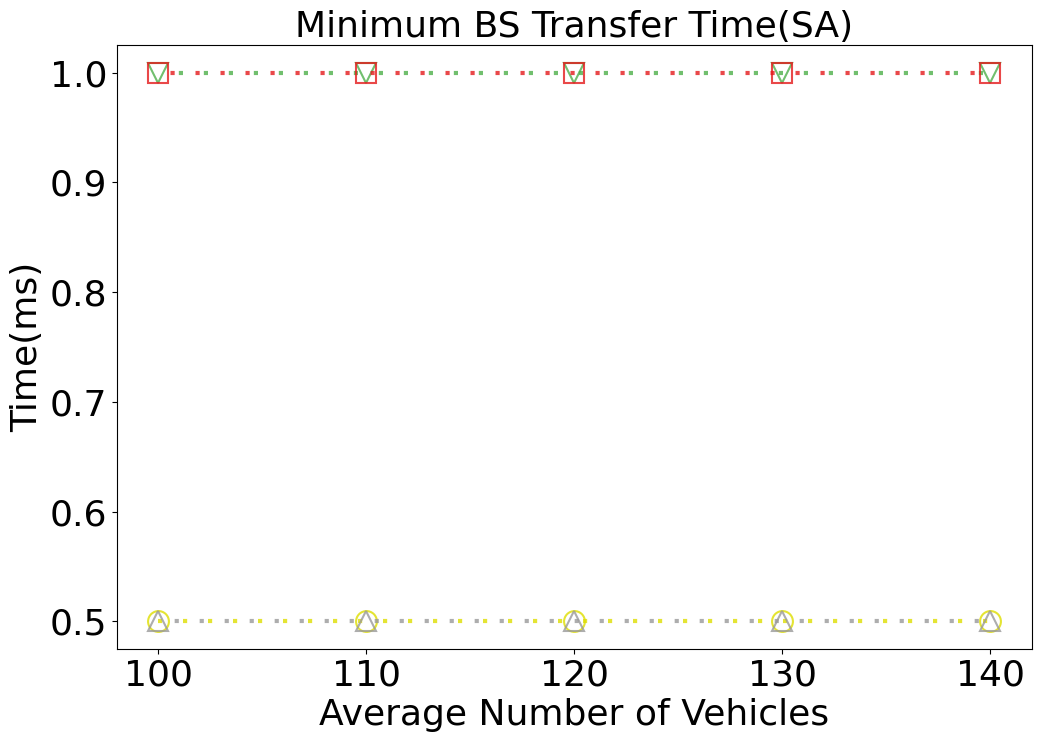

<Figure size 600x400 with 0 Axes>

In [17]:
configs = [
    {
        "catalog": "end-to-end",
        "topic": "End-to-End Time",
        "x": "Average Number of Vehicles",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "end-to-bs",
        "topic": "End-to-BS Time",
        "x": "Average Number of Vehicles",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "wait-time",
        "topic": "Wait Time",
        "x": "Average Number of Vehicles",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "bs-wait-time",
        "topic": "BS Wait Time",
        "x": "Average Number of Vehicles",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "bs-tx-time",
        "topic": "BS Transfer Time",
        "x": "Average Number of Vehicles",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
]


# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                title = "{} {}({})".format(
                        ExtractAbbreviations(subject),
                        topic,
                        ScenarioPrefix(req_rsu, qos_re_class)
                )
                if(title not in graphs):
                    graphs[title] = Graph(title, config["x"], config["y"], ncols=len(res_alloc_type_range))
                graph = graphs[title]
                for res_alloc_type in res_alloc_type_range:
                    for nft in ScenarioNetFlowType(qos_re_class):
                        y = []
                        x = [x * 100 for x in traffic_scale_range]
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][subject]
                                if v == PINF or v == NINF:
                                    v = 0
                                value.append(v * 1000)
                            y.append(sum(value) / len(value))
                        graph.addLine(
                            Line("{}:{}".format(ScenarioAllocName(res_alloc_type), nft.name.lower()), x, y)
                        )
ShowGraphs(graphs, False)
graphs= {}


In [7]:
configs = [
    {
        "catalog": "to-ratio",
        "topic": "Timeout Ratio",
        "x": "Average Number of Vehicles",
        "y": "Percent(%)",
    },
]


# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    for req_rsu in req_rsu_range:
        for qos_re_class in ScenarioQoSReClassRange(req_rsu):
            title = "{}({})".format(
                    topic,
                    ScenarioPrefix(req_rsu,qos_re_class)
                )
            if(title not in graphs):
                graphs[title] = Graph(title, config["x"], config["y"],ncols=len(res_alloc_type_range))
            graph = graphs[title]
            for res_alloc_type in res_alloc_type_range:    
                for nft in ScenarioNetFlowType(qos_re_class):
                    y = []
                    x = [x * 100 for x in traffic_scale_range]
                    for traffic_scale in traffic_scale_range:
                        value = []
                        for seed in seed_range:
                            v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name]
                            if v == PINF or v == NINF:
                                v = 0
                            value.append(v * 100)
                        y.append(sum(value) / len(value))
                    graph.addLine(
                        Line("{}:{}".format(ScenarioAllocName(res_alloc_type), nft.name.lower()), x, y)
                    )

In [ ]:
ShowGraphs(graphs,True,"general")

In [ ]:
configs = [
    {
        "catalog": "bst-thrput",
        "topic": "Throughput",
        "x": "Average Number of Vehicles",
        "y": "Megabits",
        "subject": [bs_type for bs_type in BaseStationType]
    },
]
# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                if(subject.name == "UMI" and req_rsu == False):
                    continue
                for res_alloc_type in res_alloc_type_range:
                    title = "{} {}({},{})".format(
                        subject.name, 
                        topic,
                        BaseStationScenario(req_rsu),
                        ScenarioAllocName(res_alloc_type)
                    )
                    if(title not in graphs):
                        graphs[title] = Graph(title,config["x"],config["y"])
                    graph = graphs[title]
                    if(subject.name=="UMI"):
                        nfts = [NetFlowType.CRITICAL]
                    elif(subject.name =="UMA"):
                        if req_rsu:
                            nfts = NetFlowType
                        else:
                            nfts = [NetFlowType.CRITICAL, NetFlowType.GENERAL]
                    nfts = list(map(lambda x: x.name,nfts)) + ["total"]
                    for nft in nfts:
                        y = []
                        x = [x * 100 for x in traffic_scale_range]
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v =  stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][subject.name][nft]
                                if v == PINF or v == NINF:
                                    v = 0
                                value.append(v/(10**6))
                            y.append(sum(value)/len(value))
                        graph.addLine(
                            Line("{}:{}".format(ScenarioPrefix(req_rsu,qos_re_class),nft.lower()),x,y)
                        )

In [ ]:
configs = [
    {
        "catalog": "bst-sg-rate",
        "topic": "QoS Service Traffic Ratio",
        "x": "Average Number of Vehicles",
        "y": "Percentage",
        "subject": [bs_type for bs_type in BaseStationType]
    },
]


# intialize



for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                if(subject.name == "UMI" and req_rsu == False):
                    continue
                for res_alloc_type in res_alloc_type_range:
                    title = "{} {}({},{})".format(
                        subject.name, 
                        topic,
                        BaseStationScenario(req_rsu),
                        ScenarioAllocName(res_alloc_type)
                    )
                    if(title not in graphs):
                        graphs[title] = Graph(title,config["x"],config["y"])
                    graph = graphs[title]
                    if(subject.name=="UMI"):
                        nfts = [NetFlowType.CRITICAL]
                    elif(subject.name =="UMA"):
                        if req_rsu:
                            nfts = NetFlowType
                        else:
                            nfts = [NetFlowType.CRITICAL, NetFlowType.GENERAL]
                    nfts = list(map(lambda x: x.name,nfts))
                    for nft in nfts:
                        y = []
                        x = [x * 100 for x in traffic_scale_range]
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v =  stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][subject.name][nft]
                                if v == PINF or v == NINF:
                                    v = 0
                                value.append(v*100)
                            y.append(sum(value)/len(value))
                        graph.addLine(
                            Line("{}:{}".format(ScenarioPrefix(req_rsu,qos_re_class),nft.lower()),x,y)
                        )

In [ ]:
# for line in graphs["UMA QoS Service Traffic Ratio(4G+5G,NOMA-Optim)"].lines:
#     print(line.label,line.y)
# for line in graphs["UMA QoS Service Traffic Ratio(4G+5G,NOMA-Approx)"].lines:
#     print(line.label,line.y)

In [ ]:
configs = [
    {
        "catalog": "sys-thrput",
        "topic": "System Throughput",
        "x": "Average Number of Vehicles",
        "y": "Megabits",
    },
]


# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    title = topic
    if(title not in graphs):
        graphs[title] = Graph(title,config["x"],config["y"])
    graph = graphs[title]
    for req_rsu in req_rsu_range:
        for qos_re_class in ScenarioQoSReClassRange(req_rsu):
            for res_alloc_type in res_alloc_type_range:
                y = []
                x = [x * 100 for x in traffic_scale_range]
                for traffic_scale in traffic_scale_range:
                    value = []
                    for seed in seed_range:
                        v =  stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog]["total"]
                        if v == PINF or v == NINF:
                            v = 0
                        value.append(v/10**6)
                    y.append(sum(value)/len(value))
                graph.addLine(
                            Line( 
                                "{}:\n{}".format(
                                    ScenarioPrefix(req_rsu,qos_re_class),
                                    ScenarioAllocName(res_alloc_type)
                                ),
                                x,
                                y
                            )
                )

In [ ]:
configs = [
    {
        "catalog": "veh-arv-rate",
        "topic": "Vehicle Arrival&Deparature Rate",
        "x": "Average Number of Vehicles",
        "y": "Number",
        "subject": ["avg","max","min"],
        "io": "arv"
    },
    {
        "catalog": "veh-dep-rate",
        "topic": "Vehicle Arrival&Deparature Rate",
        "x": "Average Number of Vehicles",
        "y": "Number",
        "subject": ["avg","max","min"],
        "io": "dep"
    },
]

# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                for res_alloc_type in res_alloc_type_range:
                    title = "{} {}({},{})".format(
                        ExtractAbbreviations(subject),
                        topic,
                        BaseStationScenario(req_rsu),
                        ScenarioAllocName(res_alloc_type)
                    )
                    if(title not in graphs):
                        graphs[title] = Graph(title, config["x"], config["y"])
                    graph = graphs[title]
                    for nft in ScenarioNetFlowType(qos_re_class):
                        y = []
                        x = [x * 100 for x in traffic_scale_range]
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][subject]
                                if v == PINF or v == NINF:
                                    v = 0
                                value.append(v)
                            value.sort()
                            y.append(sum(value)/len(value))
                        if(max(y) > 0):
                            graph.addLine(
                                Line(
                                    "{}:{}-{}".format(
                                        ScenarioPrefix(req_rsu, qos_re_class),
                                        config["io"],
                                        nft.name.lower()
                                    ),
                                    x,
                                    y
                                )
                            )

In [ ]:

configs = [
    {
        "catalog": "veh-arv-size",
        "topic": "Vehicle Arrival Size",
        "x": "Average Number of Vehicles",
        "y": "bits",
        "subject": ["avg","max","min"],
    },
]

# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                for res_alloc_type in res_alloc_type_range:
                    title = "{} {}({},{})".format(
                        ExtractAbbreviations(subject),
                        topic,
                        BaseStationScenario(req_rsu),
                        ScenarioAllocName(res_alloc_type)
                    )
                    if(title not in graphs):
                        graphs[title] = Graph(title, config["x"], config["y"])
                    graph = graphs[title]
                    for nft in ScenarioNetFlowType(qos_re_class):
                        y = []
                        x = [x * 100 for x in traffic_scale_range]
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][subject]
                                if v == PINF or v == NINF:
                                    v = 0
                                value.append(v)
                            value.sort()
                            y.append(sum(value)/len(value))
                        if(max(y) > 0):
                            graph.addLine(
                                Line(
                                    "{}:{}".format(
                                        ScenarioPrefix(req_rsu, qos_re_class),
                                        nft.name.lower()
                                    ),
                                    x,
                                    [v for v in y],
                                )
                            )

In [ ]:

configs = [
    {
        "catalog": "bs-arv-rate",
        "topic": "BaseStation Arrival Rate",
        "x": "Average Number of Vehicles",
        "y": "Number",
        "subject": ["avg","max","min"],
        "io":"arv",
    },
     {
        "catalog": "bs-dep-rate",
        "topic": "BaseStation Arrival Rate",
        "x": "Average Number of Vehicles",
        "y": "Number",
        "subject": ["avg","max","min"],
        "io":"dep",
    },
]

# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                scenario_bs_names = GetScenarioBaseStationNames(req_rsu)
                for res_alloc_type in res_alloc_type_range:
                    for bs_id in scenario_bs_names:
                        title = "{} {}({},{},{})".format(
                            ExtractAbbreviations(subject),
                            topic,
                            BaseStationScenario(req_rsu),
                            ScenarioAllocName(res_alloc_type),
                            bs_id
                        )
                        if(title not in graphs):
                            graphs[title] = Graph(title, config["x"], config["y"])
                        graph = graphs[title]
                        for nft in ScenarioNetFlowType(qos_re_class):
                            y = []
                            x = [x * 100 for x in traffic_scale_range]
                            for traffic_scale in traffic_scale_range:
                                value = []
                                for seed in seed_range:
                                    for name in scenario_bs_names:
                                        v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][bs_id][subject]
                                        if v == PINF or v == NINF:
                                            v = 0
                                        value.append(v)
                                y.append(sum(value)/len(value))
                            if(max(y) > 0):
                                graph.addLine(
                                    Line(
                                        "{}:{}-{}".format(
                                            ScenarioPrefix(req_rsu, qos_re_class),
                                            config["io"],
                                            nft.name.lower(),
                                        ),
                                        x,
                                        y
                                    )
                                )


In [ ]:
ShowGraphs(graphs,True,"general")

In [ ]:
from openpyxl import Workbook

# intialize
for req_rsu in req_rsu_range:
    for qos_re_class in ScenarioQoSReClassRange(req_rsu):
        for res_alloc_type in res_alloc_type_range:
            for nft in ScenarioNetFlowType(qos_re_class):
                wb = Workbook()
                ws = wb.active
                for catalog in ["veh-arv-rate", "veh-dep-rate", "veh-arv-size"]:
                    ws.title = catalog.upper()
                    ws.append([" "] + [x * 100 for x in traffic_scale_range])
                    for subject in ["avg", "max", "min", "num"]:
                        y = []
                        for traffic_scale in traffic_scale_range:
                            value = []
                            for seed in seed_range:
                                v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][subject]
                                if v == PINF or v == NINF:
                                    v = 0
                                value.append(v)
                            value.sort()
                            y.append(sum(value) / len(value))
                        ws.append([subject.upper(), *y])
                    ws = wb.create_sheet("New Sheet")
                path = "/".join([
                    "vars",
                    ScenarioPrefix(req_rsu, qos_re_class),
                    ScenarioAllocName(res_alloc_type),
                    nft.name]
                )
                if not os.path.isdir(path):
                    os.makedirs(path)
                wb.save(
                    "{}/{}_{}_{}_VEHICLES.xlsx".format(
                        path,
                        ScenarioPrefix(req_rsu, qos_re_class),
                        ScenarioAllocName(res_alloc_type),
                        nft.name
                    )
                )


In [ ]:

# intialize
for req_rsu in req_rsu_range:
    for qos_re_class in ScenarioQoSReClassRange(req_rsu):
        for res_alloc_type in res_alloc_type_range:
            for nft in ScenarioNetFlowType(qos_re_class):
                scenario_bs_names = GetScenarioBaseStationNames(req_rsu)
                for bs_id in scenario_bs_names:
                    wb = Workbook()
                    ws = wb.active
                    for catalog in ["bs-arv-rate", "bs-dep-rate", "bs-arv-size"]:
                        ws.title = catalog.upper()
                        ws.append([" "] + [x * 100 for x in traffic_scale_range])
                        for subject in ["avg", "max", "min", "num"]:
                            y = []
                            for traffic_scale in traffic_scale_range:
                                value = []
                                for seed in seed_range:
                                    v = stats[qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][bs_id][subject]
                                    if v == PINF or v == NINF:
                                        v = 0
                                    value.append(v)
                                value.sort()
                                y.append(sum(value) / len(value))
                            ws.append([subject.upper(), *y])
                        ws = wb.create_sheet("New Sheet")
                    path = "/".join([
                        "vars",
                        ScenarioPrefix(req_rsu, qos_re_class),
                        ScenarioAllocName(res_alloc_type),
                        nft.name]
                    )
                    if not os.path.isdir(path):
                        os.makedirs(path)
                    wb.save(
                        "{}/{}_{}_{}_{}.xlsx".format(
                            path,
                            ScenarioPrefix(req_rsu, qos_re_class),
                            ScenarioAllocName(res_alloc_type),
                            nft.name,
                            bs_id.upper()
                        )
                    )
